<center><h1 style="color:#1a1a1a;
                    font-size:3em">
        Projet: 📈 Séries Chronologiques 
        </h1> 
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Analyse et Prévision de la série chronologique de température 🌡️
        </h2>
</center>

<div style="font-size:1.3em">
    <span>
    Réalisé par :¶
    </span>
      <ul>
         <li>ELGHABI Taha</li>
         <li>ELBATOURI Badr-eddine</li>
      </ul>
    <span>
    Encadré par :¶
    </span>
      <ul>
         <li>M. BADAOUI FADOUA</li>
      </ul>
</div>

<p style="font-size:1.5em">📜 Table des matières:</p>
<div style="font-size:1.3em">    
    <ul>
       <li><a href="#Intro-section">Introduction 📖</a></li>
          <ul>
             <li><a href="#overview">Aperçu</a></li>
             <li><a href="#dataset">Jeu de données</a></li>
          </ul>
       <li>
          <a href="#Analysis-section">Analyses et Transformations 🔎</a>
          <ul>
             <li><a href="#eda">Exploration de données</a></li>
             <li><a href="#Decomposition">Décomposition de séries temporelles</a></li>
             <li><a href="#Stationarity">Stationnarité</a></li>
             <li><a href="#pre-processing">Préparation des données</a></li>
          </ul>
       </li>
       <li>
          <a href="#Forcasting-section">Prévision de séries chronologiques 🧿</a>
          <ul>
             <li><a href="#AR-model">Autoregression (AR)</a></li>
             <li><a href="#MA-model">Moving Average (MA)</a></li>
             <li><a href="#ARMA-model">Autoregressive Moving Average (ARMA)</a></li>
             <li><a href="#ARIMA-model">Autoregressive integraded moving average (ARIMA)</a></li>
             <li><a href="#SARIMA-model">Seasonal autoregressive integrated moving average (SARIMA)</a></li>
          </ul>
       <li><a href="#Conclusion">Conclusion 📌</a></li>
    </ul>
</div>

<center id="Intro-section">
        <h1 style="color:#1a1a1a;
                    font-size:2em">
        Introduction 📖
        </h1>
</center>

<div id="overview">
        <h1 style="color:#1a1a1a">
         ⮞  Aperçu
        </h1>
</div>


<span style="color:grey; font-size:1.2em">Ce projet contient une collection de modèles <b>analytiques, transformationnels et prédictifs</b> qui sont fréquemment utilisés lors de l'utilisation de séries chronologiques. Le but de ce référentiel est de montrer comment modéliser des<b> séries chronologique</b> , pour cela nous utilisons un ensemble de données de cas d'utilisation réel <i>(ensemble de données sur la température moyenne de Delhi)</i></span>

<div id="dataset">
        <h1 style="color:#1a1a1a;
                    ">
         ⮞  Jeu de données
        </h1>
</div>


<span style="color:grey; font-size:1.2em">La série qu'on va traiter est <b> la température moyenne de Delhi</b>. Notre jeu de données contient des données de météo de<b> 2013 à 2017 échantillonnées</b>  chaque mois ainsi que des caractéristiques météorologiques supplémentaires telles que la pression, l'humidité, etc.</span>


<center id="Analysis-section">
        <h1 style="color:#1a1a1a;
                    font-size:2em">
        Analyses et Transformations 🔎
        </h1>
</center>

<div id="eda">
        <h1 style="color:#1a1a1a;
                    ">
         ⮞  Exploration de données
        </h1>
</div>

<h4 style="color:grey; font-size:1.5em"> Importation de bibliothèques </h4>

In [1]:
#  ignorer les avertissements
options(warn=-1)

In [2]:
# définir une seed pour reproduire les résultats
set.seed(42)

In [3]:
# importer les bibliothèques nécessaires
library(forecast)
library(tseries)
library(astsa)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘astsa’


The following object is masked from ‘package:forecast’:

    gas




<span style="color:grey; font-size:1.2em">Important notre jeu de données sous le fichier <b>weekly_climate.txt</b> content la serie en format <b>csv</b>.</span>

In [4]:
data <- read.csv("../input/weekly/weekly_climate.txt")

<h4 style="color:grey; font-size:1.5em"> Explorant notre jeu de données </h4>

In [5]:
head(data)

,date,meantemp,humidity,wind_speed,meanpressure
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2013-01-01,7.604762,83.29524,2.903810,1017.686
2,2013-01-08,13.176871,66.51190,8.013265,1015.942
3,2013-01-15,13.409524,80.06803,4.471905,1017.973
4,2013-01-22,12.848639,64.74830,4.981973,1019.885
5,2013-01-29,16.107653,70.27959,3.396378,1016.555
6,2013-02-05,15.635034,70.97466,8.058946,1017.324


In [6]:
tail(data)

,date,meantemp,humidity,wind_speed,meanpressure
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
220,2017-03-14,22.20962,53.31935,7.872741,1012.396
221,2017-03-21,27.75238,42.35952,10.662262,1010.076
222,2017-03-28,30.34637,35.46769,9.259666,1006.324
223,2017-04-04,28.42764,29.09575,12.672740,1007.434
224,2017-04-11,30.49206,30.51786,6.395040,1004.810
225,2017-04-18,33.43214,30.55374,8.624393,1001.479


<span style="color:grey; font-size:1.2em">Un aperçu des données en utilisant les fonctions <b>summary</b> et <b>str</b> de R pour examiner les données. </span>

In [7]:
summary(data)

     date              meantemp         humidity       wind_speed     
 Length:225         Min.   : 7.605   Min.   :23.82   Min.   : 0.9929  
 Class :character   1st Qu.:18.554   1st Qu.:50.68   1st Qu.: 4.9346  
 Mode  :character   Median :27.752   Median :62.38   Median : 7.1161  
                    Mean   :25.232   Mean   :60.42   Mean   : 6.9036  
                    3rd Qu.:31.102   3rd Qu.:71.89   3rd Qu.: 8.7982  
                    Max.   :37.293   Max.   :91.80   Max.   :14.8972  
  meanpressure   
 Min.   : 857.2  
 1st Qu.:1001.7  
 Median :1009.0  
 Mean   :1010.6  
 3rd Qu.:1015.2  
 Max.   :1964.5  

In [8]:
str(data)

'data.frame':	225 obs. of  5 variables:
 $ date        : chr  "2013-01-01" "2013-01-08" "2013-01-15" "2013-01-22" ...
 $ meantemp    : num  7.6 13.2 13.4 12.8 16.1 ...
 $ humidity    : num  83.3 66.5 80.1 64.7 70.3 ...
 $ wind_speed  : num  2.9 8.01 4.47 4.98 3.4 ...
 $ meanpressure: num  1018 1016 1018 1020 1017 ...


<span style="color:grey; font-size:1.2em">Les données n'ont pas de <b>valeurs manquantes</b>, nous n'effectuerons donc pas un <b>nettoyage des données.</b> </span>

<h4 style="color:grey; font-size:1.5em">Transformation de données</h4>

<span style="color:grey; font-size:1.2em">On va créer un objet de type <b>série temporelle</b> dans R contenant notre jeu de données.</span>

In [9]:
ts <- ts(data$meantemp, frequency = 52)

<span style="color:grey; font-size:1.2em">Represenatant la serie graphiquement en utlisant <b> plot</b>.</span>


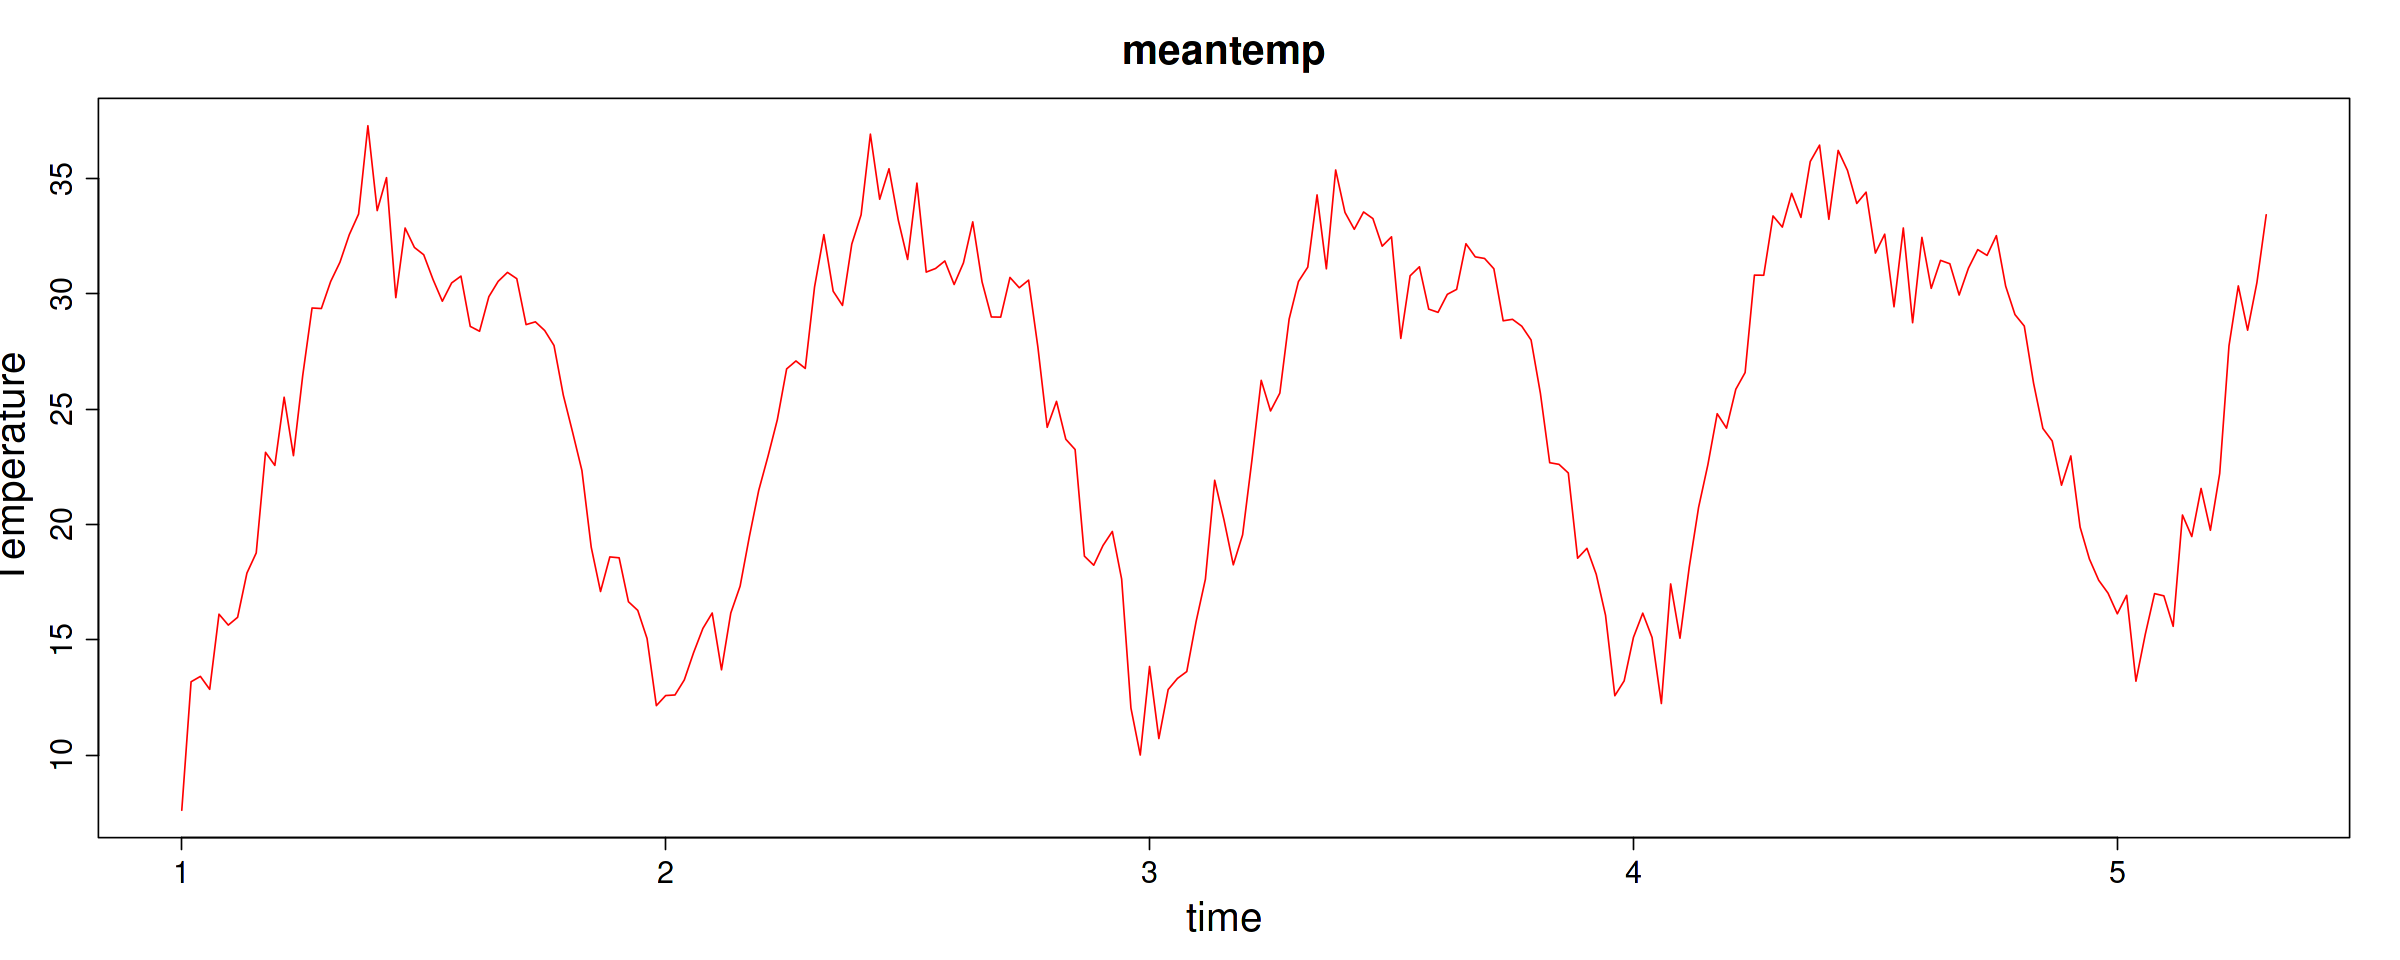

In [10]:
# changer la taille du plot
options(repr.plot.width=20, 
        repr.plot.height = 8
        )

# changer la taille de label. axis et main
par(cex.lab=2,
    cex.axis=1.5, 
    cex.main=2)

# ploter la serie 'ts'
plot.ts(ts,       
        main="meantemp",
        xlab= "time",
        ylab="Température",
        col="red",
 )

<div id="Decomposition">
        <h1 style="color:#1a1a1a;
                    ">
         ⮞  Décomposition de séries temporelles
        </h1>
</div>

<span style="color:grey; font-size:1.2em">On effectue une décomposition de notre série qui consiste a séparer notre série en plusieurs <b> sous-séries</b> représentant des aspects essentiels comme <b>tendance, cycle</b> et <b>bruit</b> :</span>


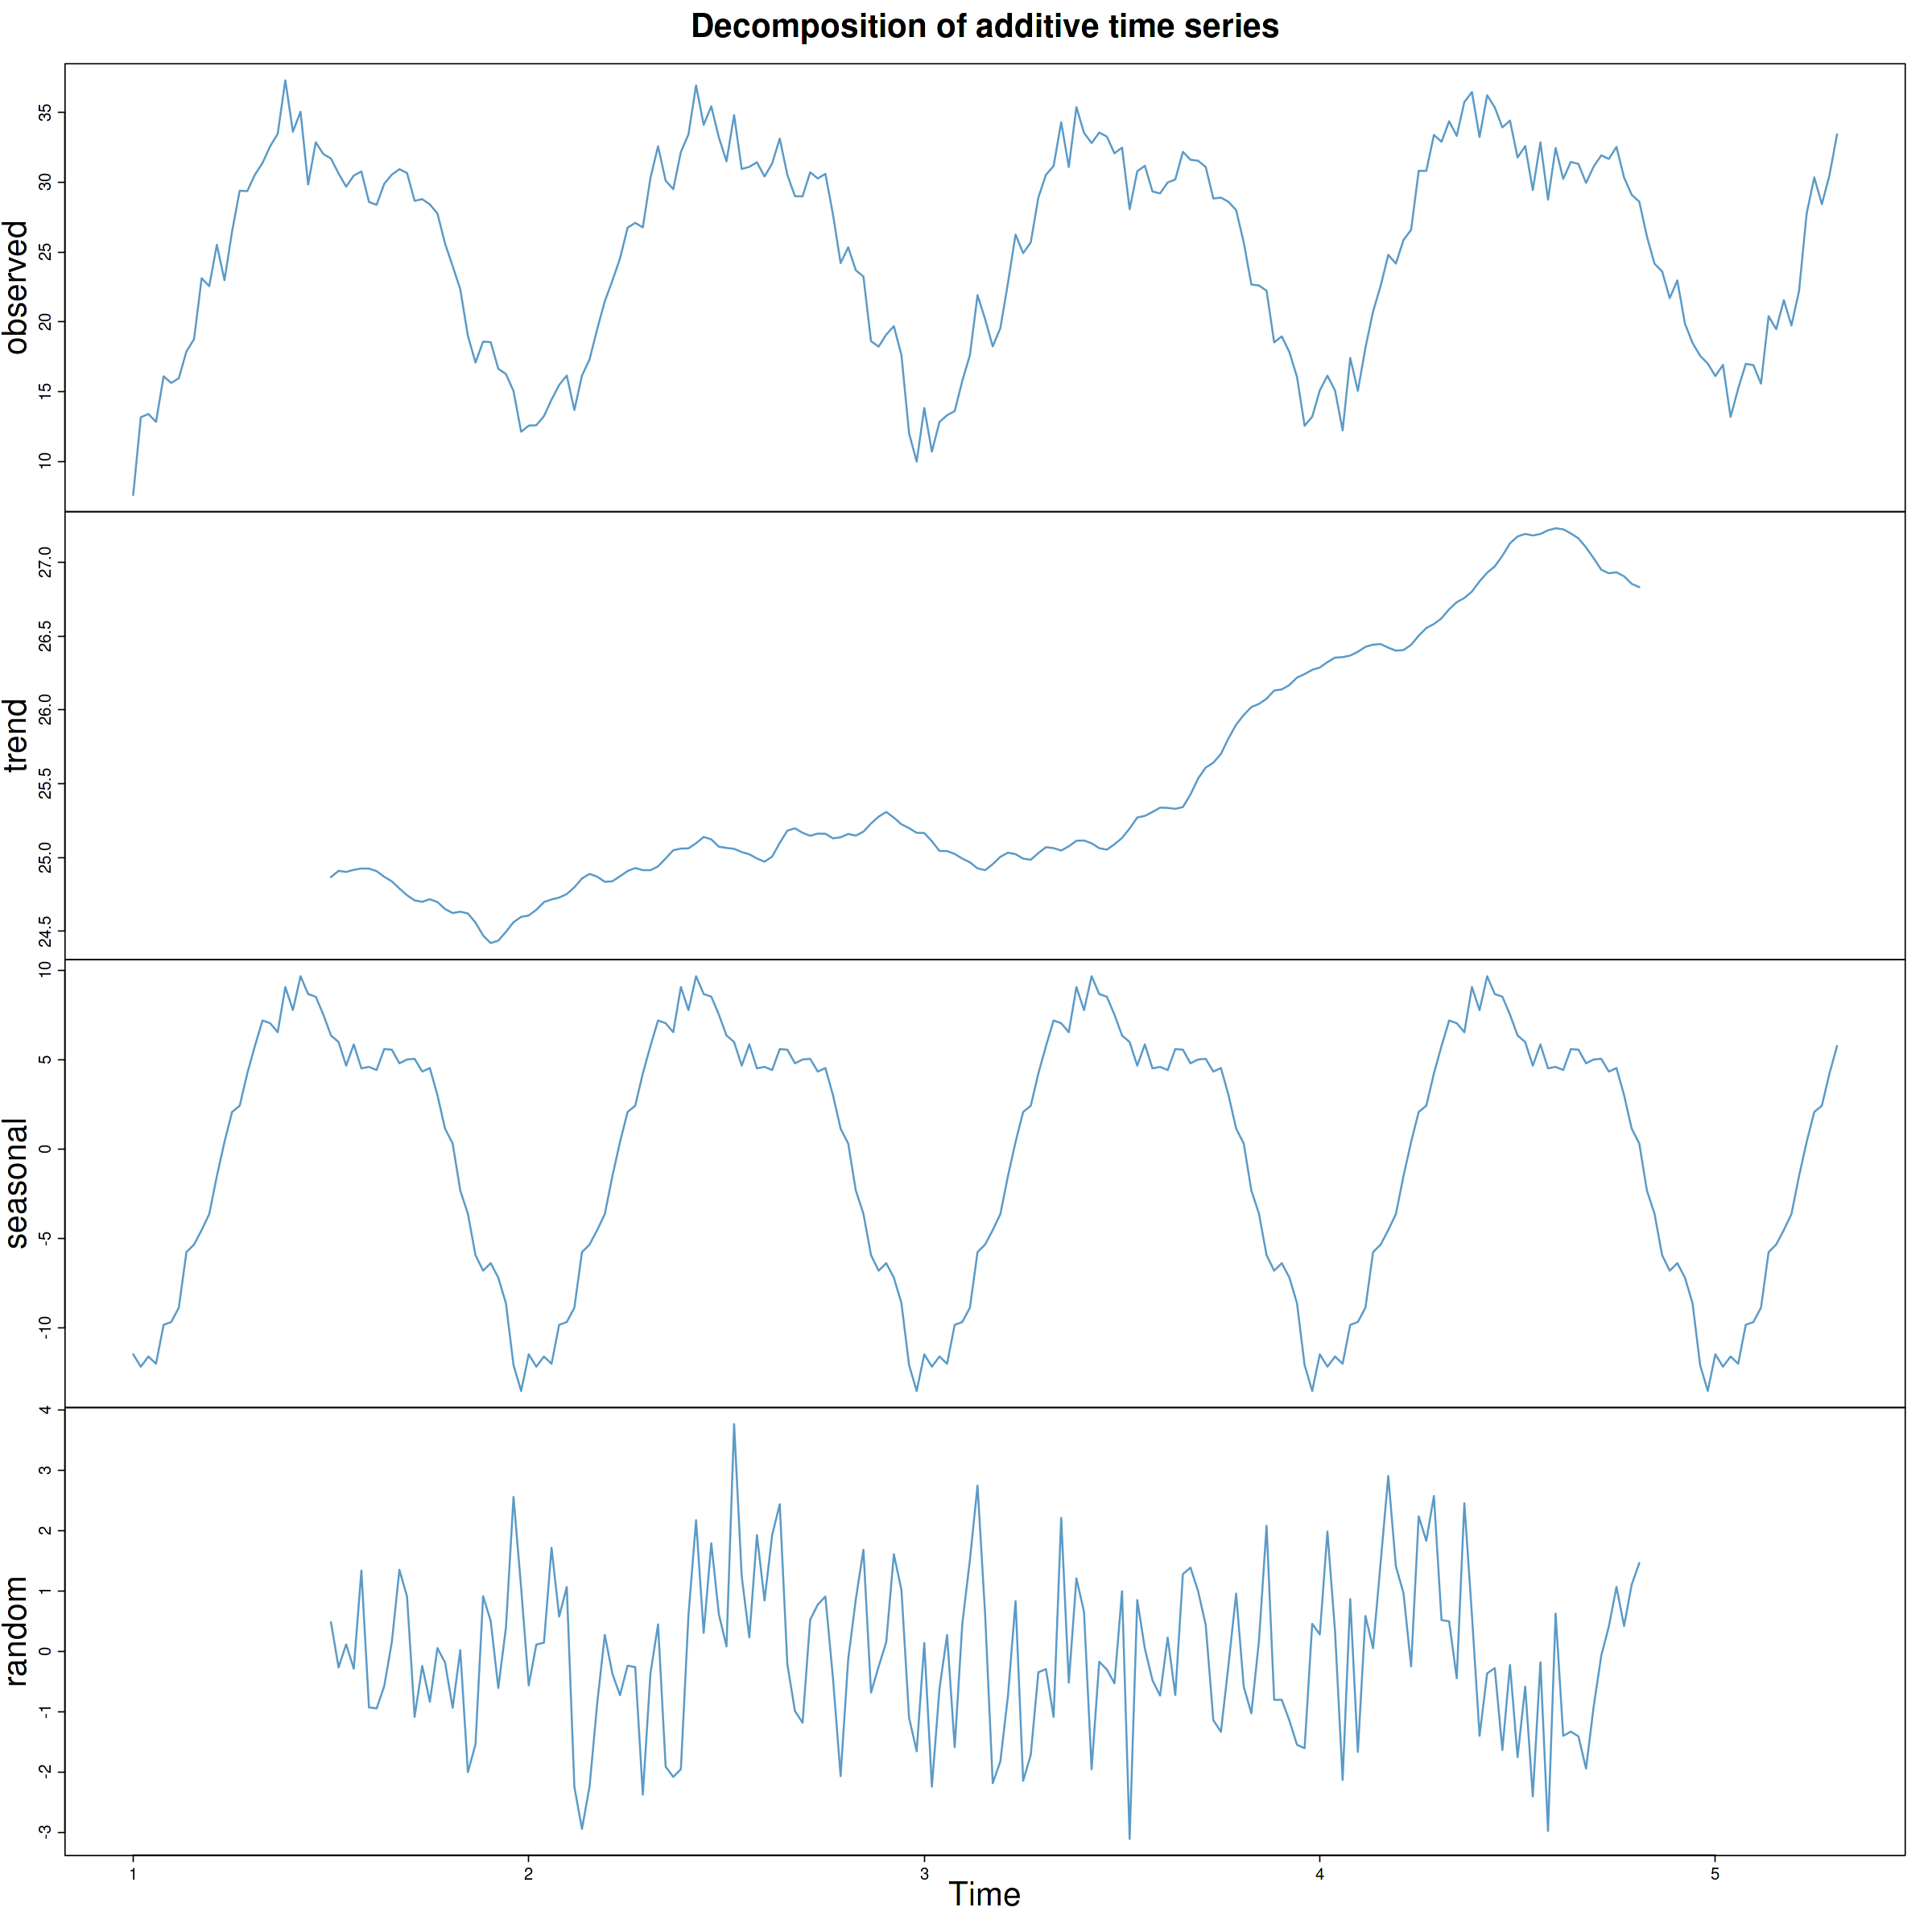

In [11]:
# decomposition de type additif
ts.decomp.ad <- decompose(ts, type = "additive")

# changer la taille du plot et de label. axis et main
options(repr.plot.width=20, repr.plot.height = 20)
par(cex.lab=2,
    cex.axis=1.5, 
    cex.main=2)

# ploter la decomposition
plot(ts.decomp.ad, col="#5A9AC7", lwd = 1.5)

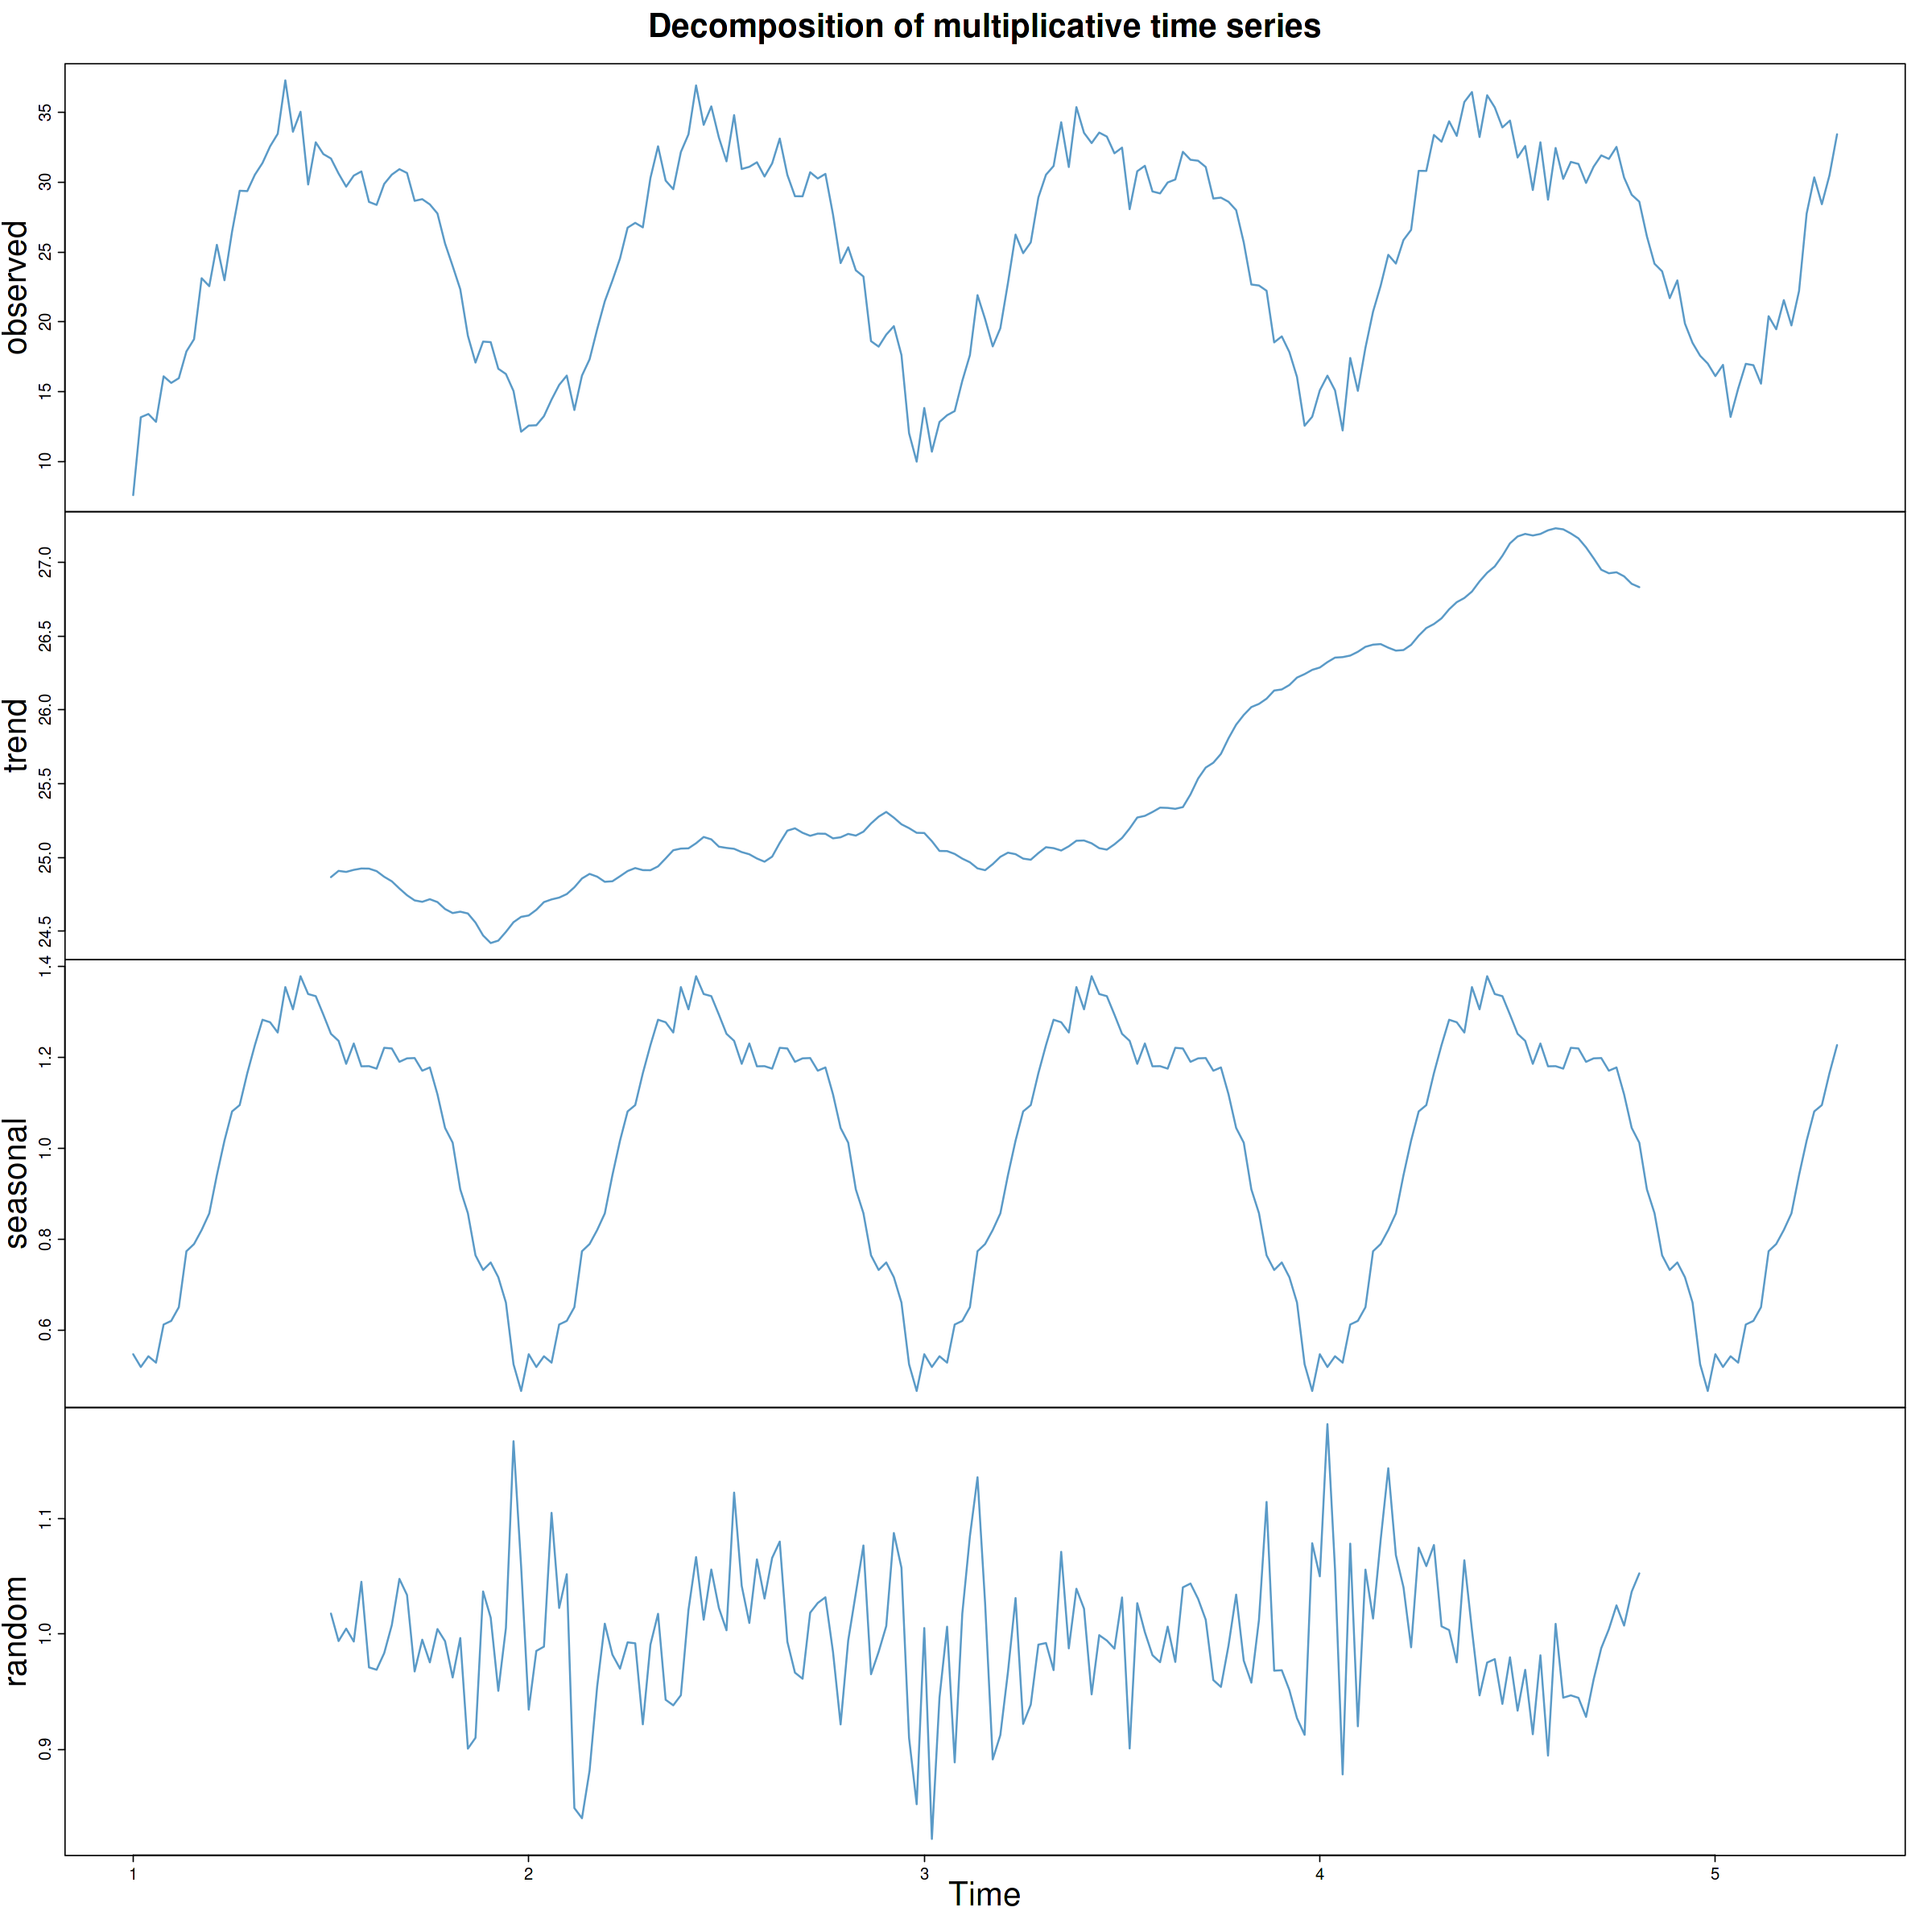

In [12]:
# decomposition de type multiplicatif
ts.decomp.mu <- decompose(ts, type = "multiplicative")

# changer la taille du plot et de label. axis et main
options(repr.plot.width=20, repr.plot.height = 20)
par(cex.lab=2,
    cex.axis=1.5, 
    cex.main=2)

# ploter la decomposition
plot(ts.decomp.mu,  col="#5A9AC7", lwd = 1.5)

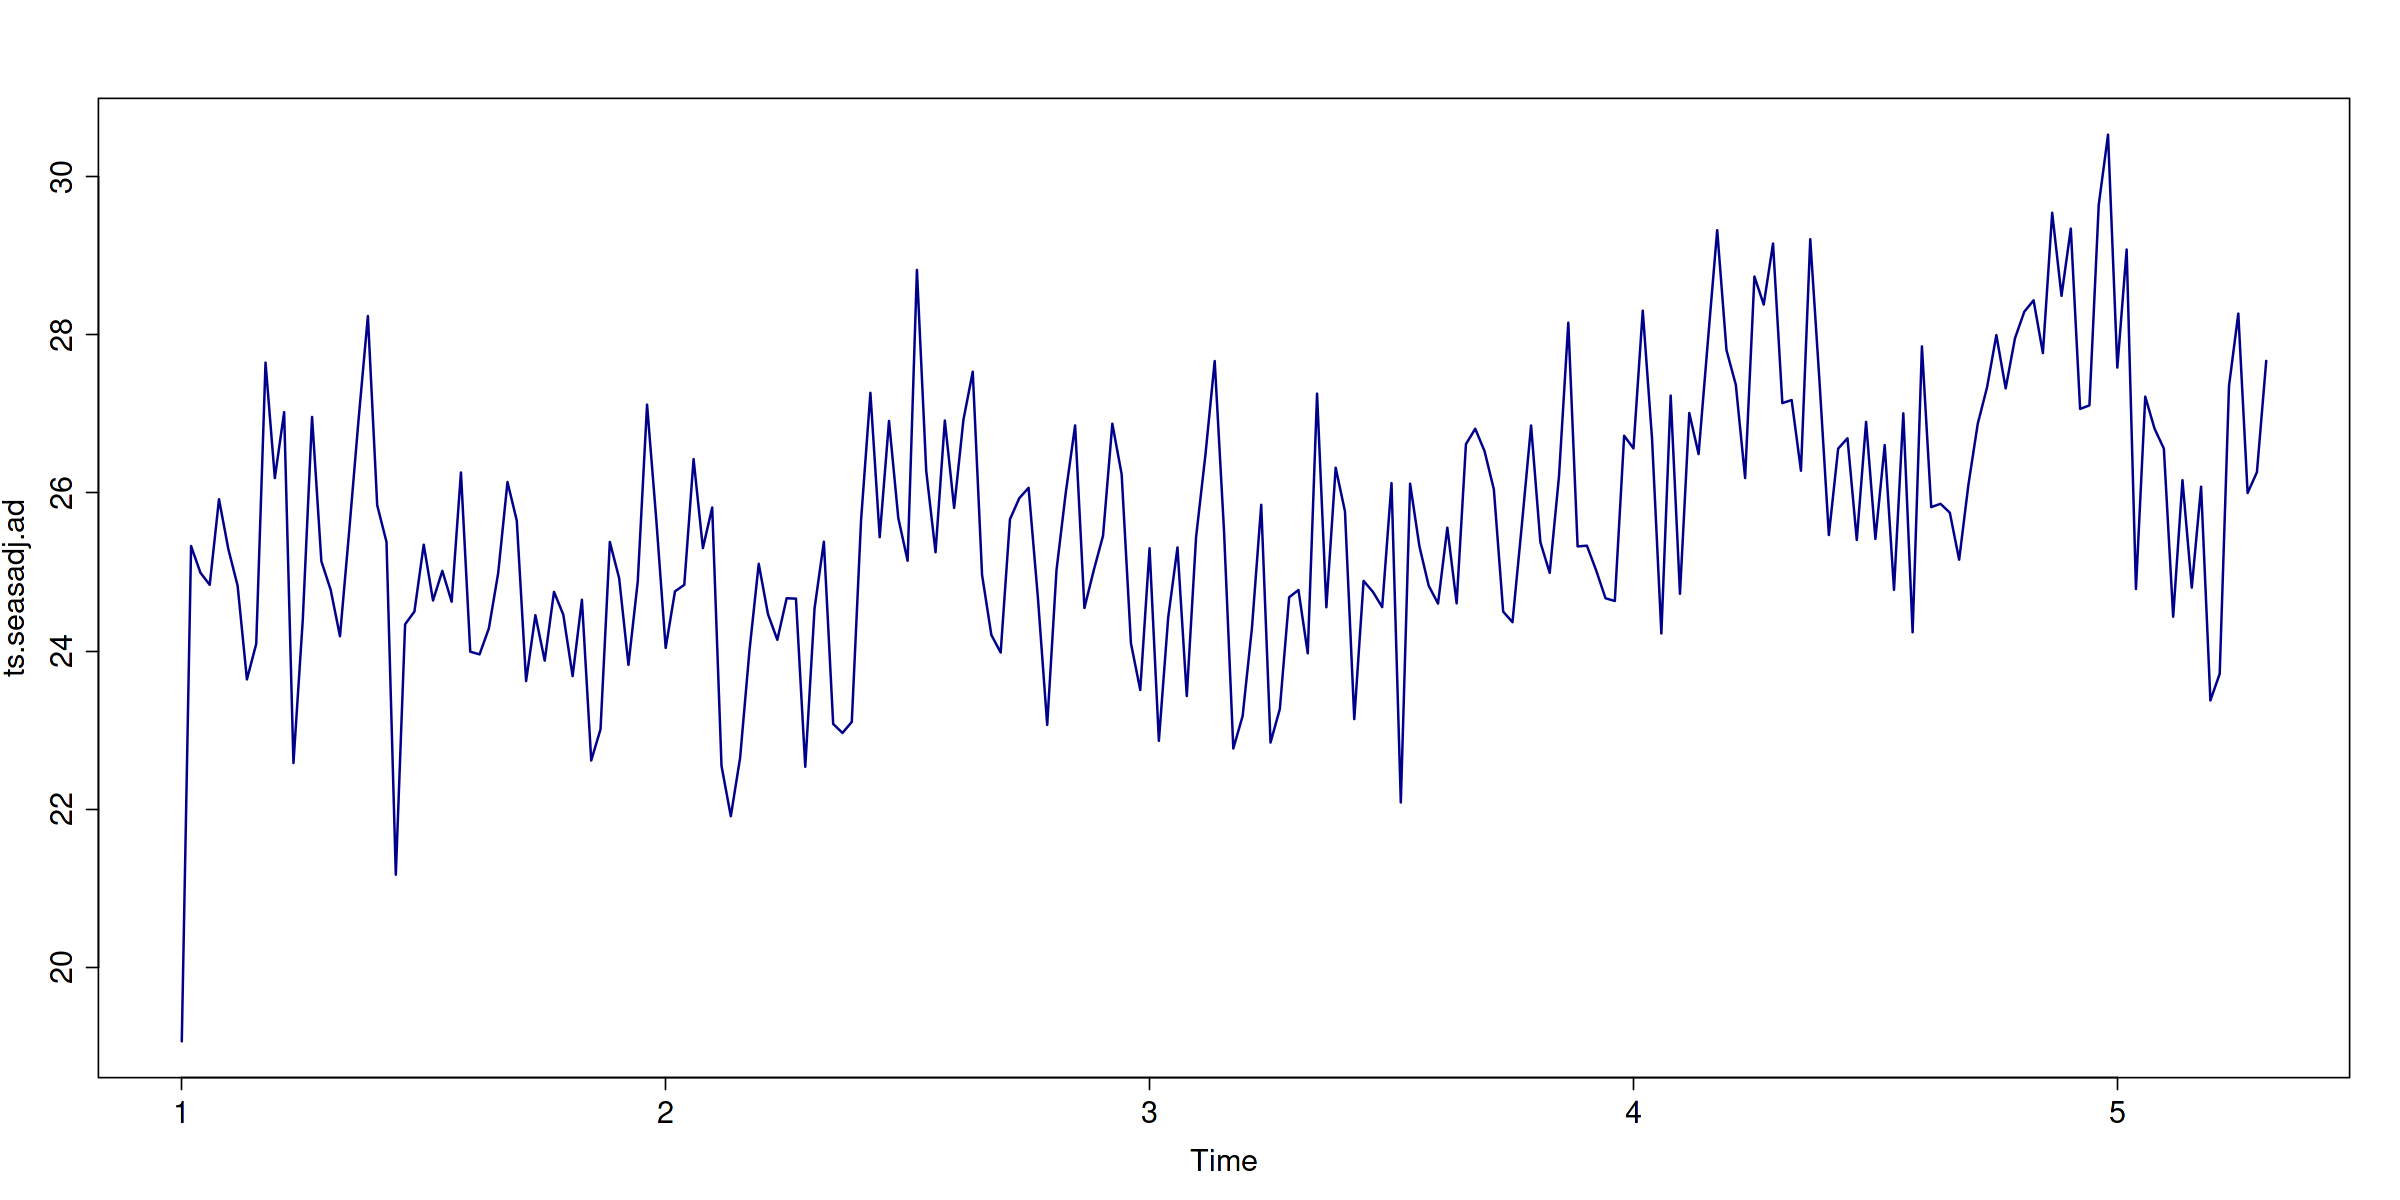

In [13]:
# la tendance 
ts.seasadj.ad <- ts - ts.decomp.ad$seasonal

# changer la taille du plot et de label. axis et main
options(repr.plot.width=20, repr.plot.height = 10)
par(cex.lab=1.5,
    cex.axis=1.5, 
    cex.main=2)

# ploter la tendance 
plot.ts(ts.seasadj.ad, col="dark blue", lwd = 1.5)

<div id="Stationarity">
        <h1 style="color:#1a1a1a;
                    ">
         ⮞  Stationnarité
        </h1>
</div>

<span style="color:grey; font-size:1.2em">On calcule <b>l'autocorrélation</b> et <b>l'autocorrélation partielle</b> de la série ( pour différents décalages <b> k < 36 </b> )</span>

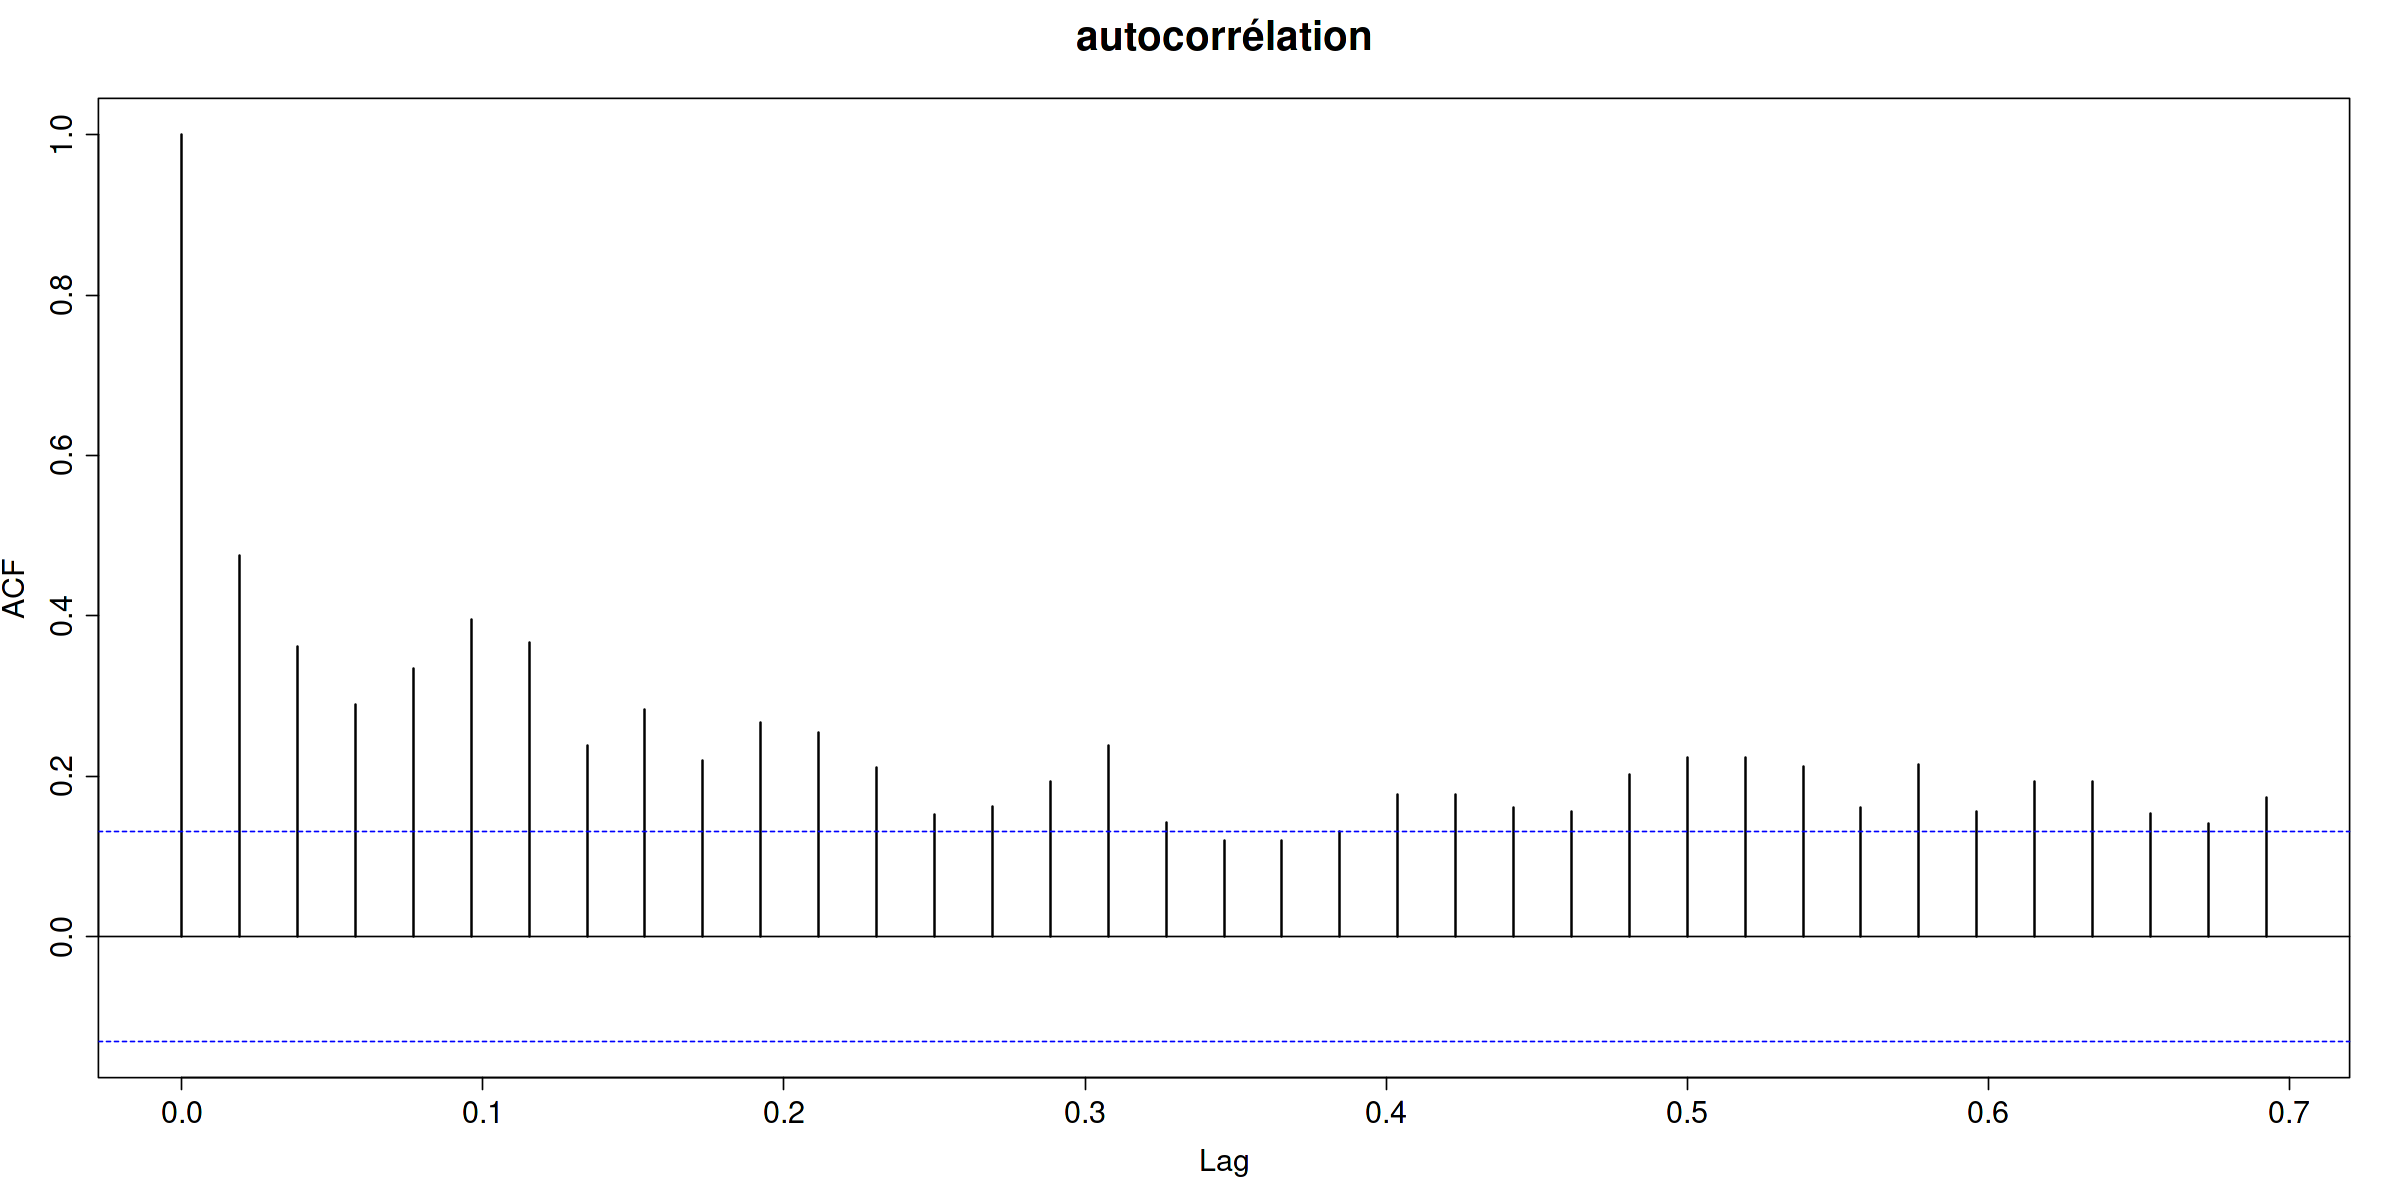

In [14]:
# changer la taille du plot
options(repr.plot.width=20, repr.plot.height = 10)
par(cex.lab=1.5,
    cex.axis=1.5, 
    cex.main=2)

# calculer l'autocorrélation
acf(ts.seasadj.ad,main="autocorrélation", lag.max = 36, lwd=1.5)

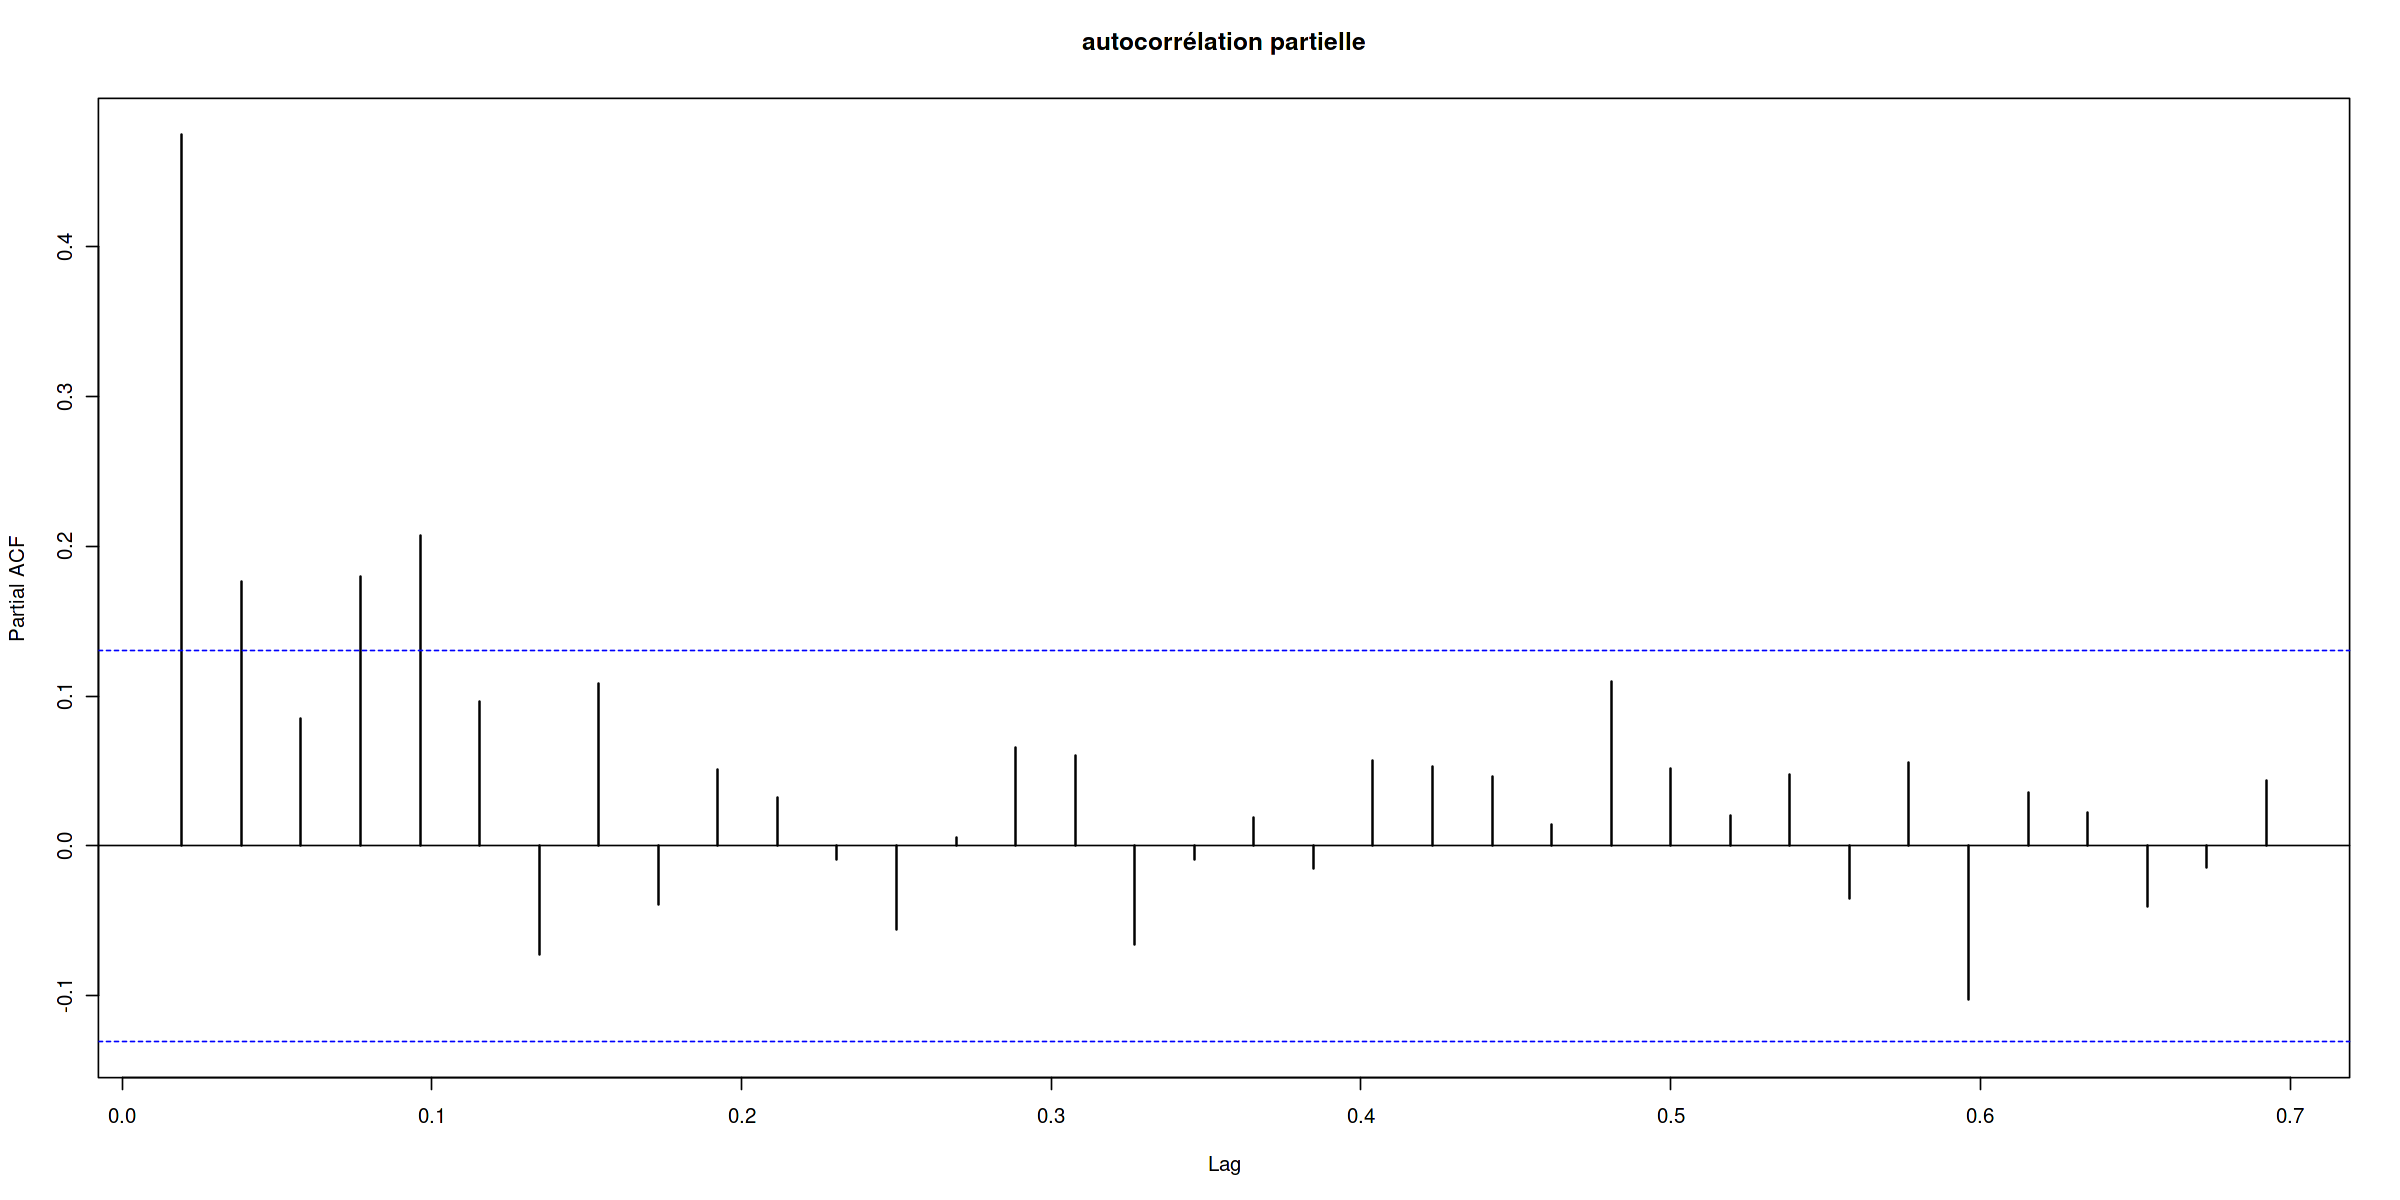

In [15]:
# calculer l'autocorrélation partielle
pacf(ts.seasadj.ad, main="autocorrélation partielle",lag.max = 36, lwd=1.5)

 

<span style="color:grey; font-size:1.2em">On effectue le test  <b>dickey-fuller augmentée </b> pour vérifier <b>la stationnarité</b> </span>


In [16]:
# le test dickey-fuller augmentée
adf.test(ts, alternative = "stationary", k = 0)


	Augmented Dickey-Fuller Test

data:  ts
Dickey-Fuller = -2.7835, Lag order = 0, p-value = 0.247
alternative hypothesis: stationary



<span style="color:grey; font-size:1.2em">On a <b>p-value = 0.24 > 0.05</b> -> donc notre serie <b> n'est pas stationaire</b> </span>


In [17]:
# ickey-fuller test avec log
adf.test(log(ts), alternative = "stationary", k = 0)


	Augmented Dickey-Fuller Test

data:  log(ts)
Dickey-Fuller = -3.6585, Lag order = 0, p-value = 0.02865
alternative hypothesis: stationary


<span style="color:grey; font-size:1.2em">La serie devient <b>stationaire</b> lorsqu'on fait une <b>transformation logarithmique</b> </span>

<div id="pre-processing">
        <h1 style="color:#1a1a1a;
                    ">
        ⮞ Préparation des données
        </h1>
</div>

In [18]:
# diviser les données
split1<- sample(c(rep(0, 0.8 * nrow(data)), rep(1, 0.2 * nrow(data))))
train <- data[split1 == 0,]
test <- data[split1 == 1,]



<span style="color:grey; font-size:1.2em">On prend  <b>80%</b> de série pour l'entrainment et <b>20%</b> pour la validation</span>


In [19]:
# appliquer la fonction log
ts.train <- log(ts(train$meantemp, frequency = 52))
ts.test <- log(ts(test$meantemp, frequency = 52))

<center id="Forcasting-section">
        <h1 style="color:#1a1a1a;
                    font-size:2em">
        Prévision de série chronologique 🧿
        </h1>
</center>

<div id="AR-model">
        <h1 style="color:#1a1a1a;
                    ">
        ⮞ Autoregression (AR)
        </h1>
</div>



<span style="color:grey; font-size:1.2em">Les méthodes autorégressives (AR) modélisent l'étape suivante d'une séquence comme une fonction linéaire des observations à des étapes de temps antérieures.</span>

In [20]:
# méthode AR
ar <- arima(ts.train, order=c(7,0,0), transform.pars = TRUE)
summary(ar)


Call:
arima(x = ts.train, order = c(7, 0, 0), transform.pars = TRUE)

Coefficients:
         ar1     ar2     ar3     ar4      ar5      ar6      ar7  intercept
      0.8000  0.1455  0.1599  0.0839  -0.1130  -0.0999  -0.1136     3.1669
s.e.  0.0797  0.1022  0.1022  0.1025   0.1035   0.1034   0.0812     0.0602

sigma^2 estimated as 0.01209:  log likelihood = 140.29,  aic = -262.57

Training set error measures:
                      ME      RMSE        MAE         MPE     MAPE      MASE
Training set 0.002562609 0.1099357 0.08092965 -0.03708792 2.729231 0.9156765
                    ACF1
Training set -0.07955594

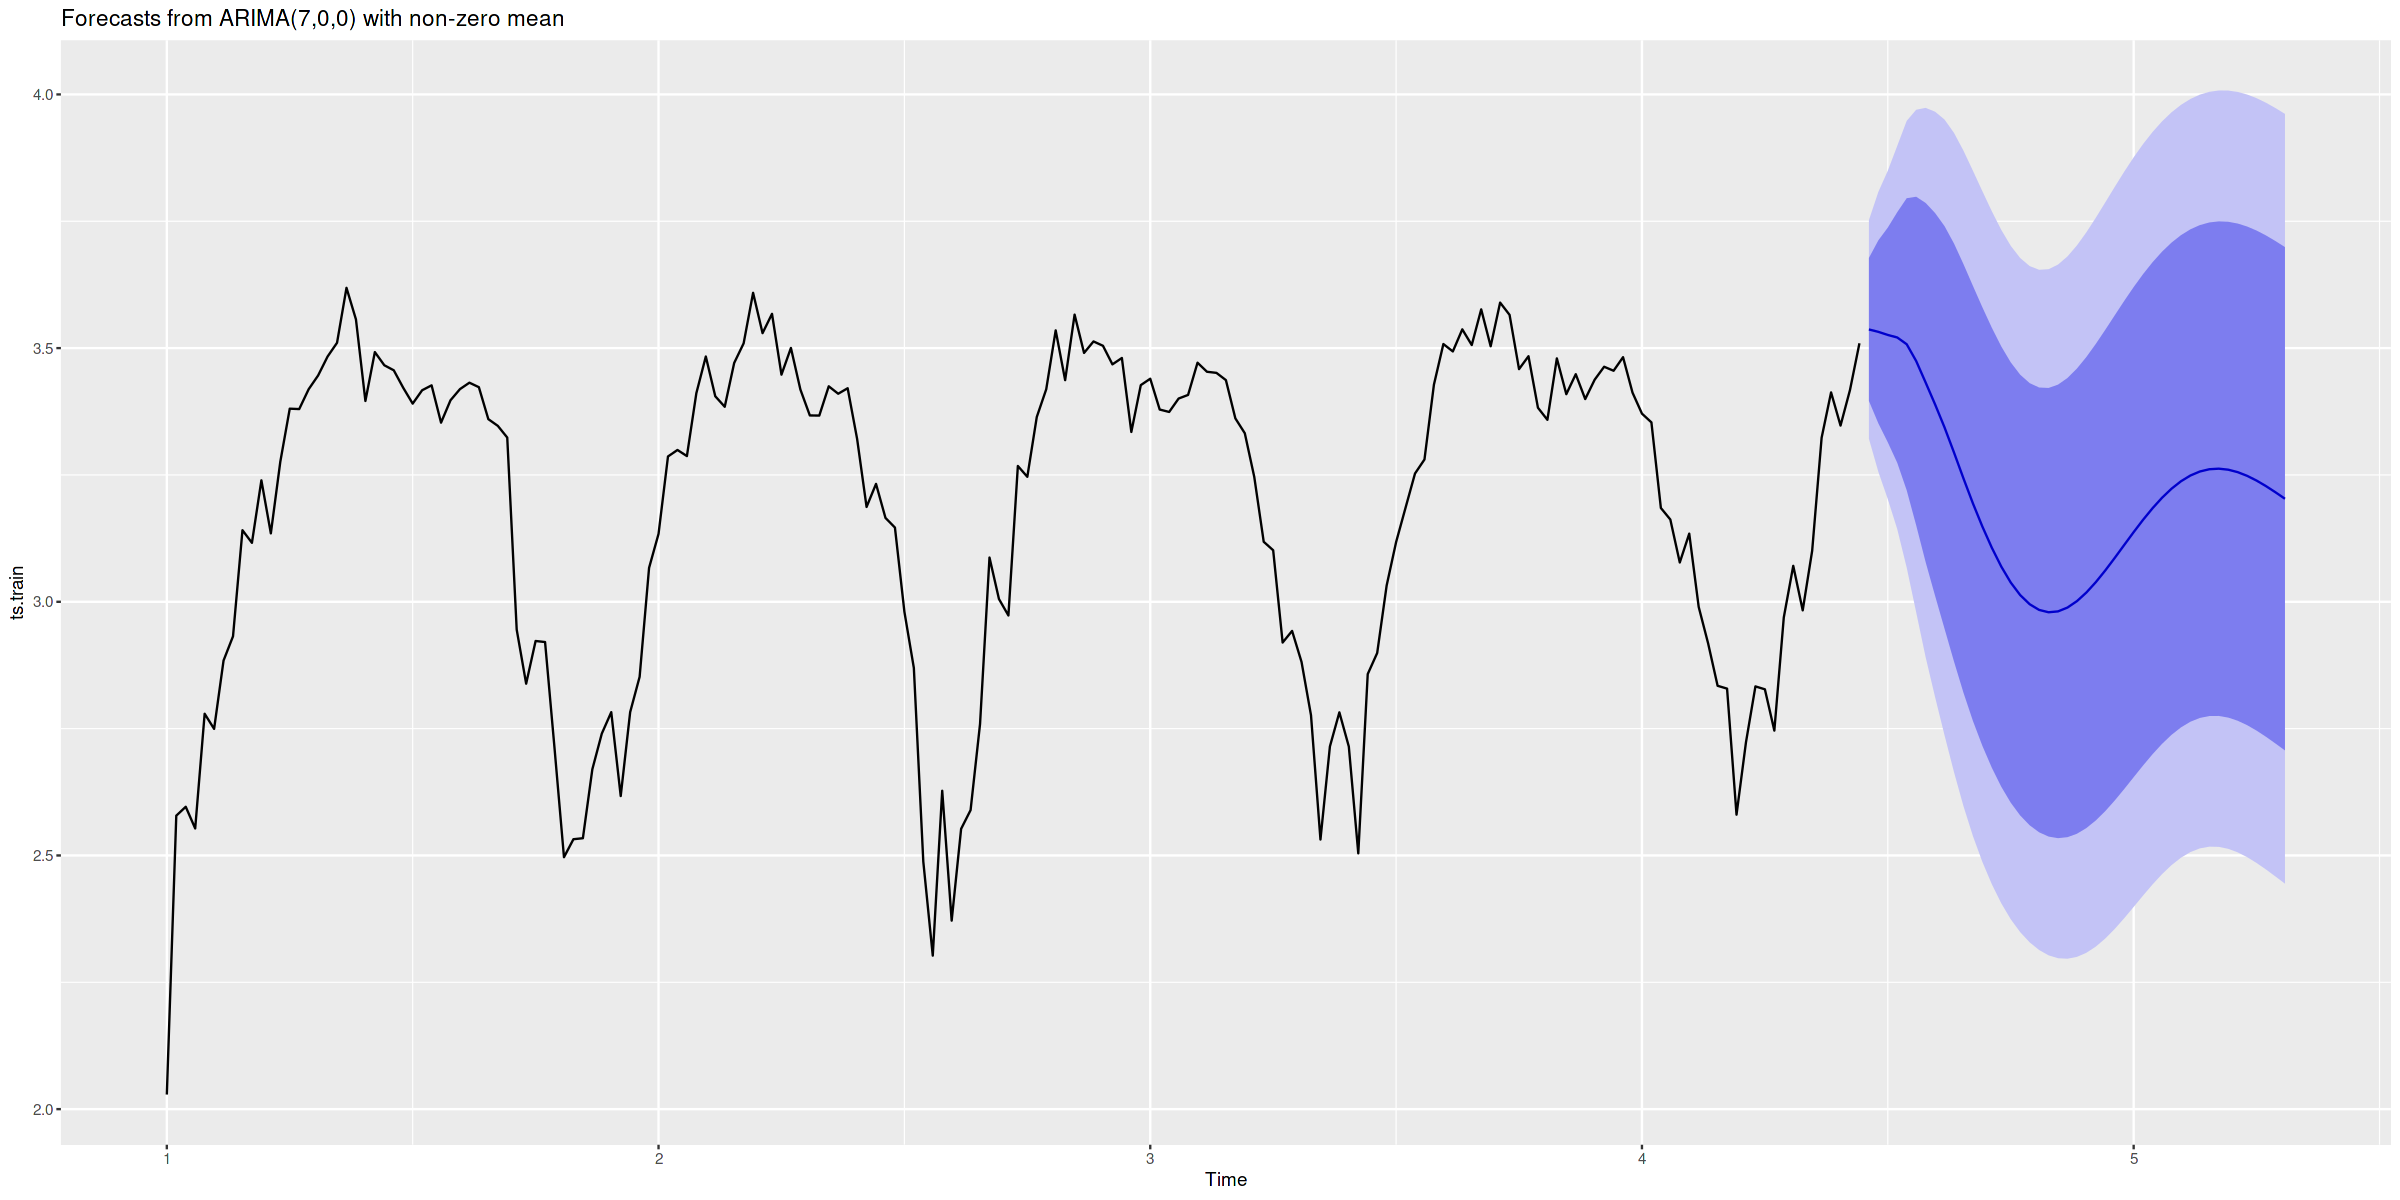

In [21]:
# changer la taille du plot
options(repr.plot.width=20, repr.plot.height =10 )

# résultats prévisionnels
ar_forecast <- forecast(ar, h=length(ts.test))
autoplot(ar_forecast)

<div id="MA-model">
        <h1 style="color:#1a1a1a;
                    ">
        ⮞ Moving Average (MA)
        </h1>
</div>


<span style="color:grey; font-size:1.2em">La méthode de la moyenne mobile (MA) modélise l'étape suivante de la séquence comme la moyenne des fenêtres d'observation des étapes de temps précédentes.</span>

In [22]:
# méthode MA
ma <- arima(ts.train, order=c(0,0,3), transform.pars = TRUE)
summary(ma)


Call:
arima(x = ts.train, order = c(0, 0, 3), transform.pars = TRUE)

Coefficients:
         ma1     ma2     ma3  intercept
      1.1399  0.8910  0.3812     3.1729
s.e.  0.0814  0.0846  0.0560     0.0388

sigma^2 estimated as 0.02361:  log likelihood = 80.93,  aic = -151.86

Training set error measures:
                      ME      RMSE      MAE        MPE     MAPE     MASE
Training set 0.003994438 0.1536599 0.116767 -0.2832233 3.924042 1.321158
                   ACF1
Training set 0.03148452

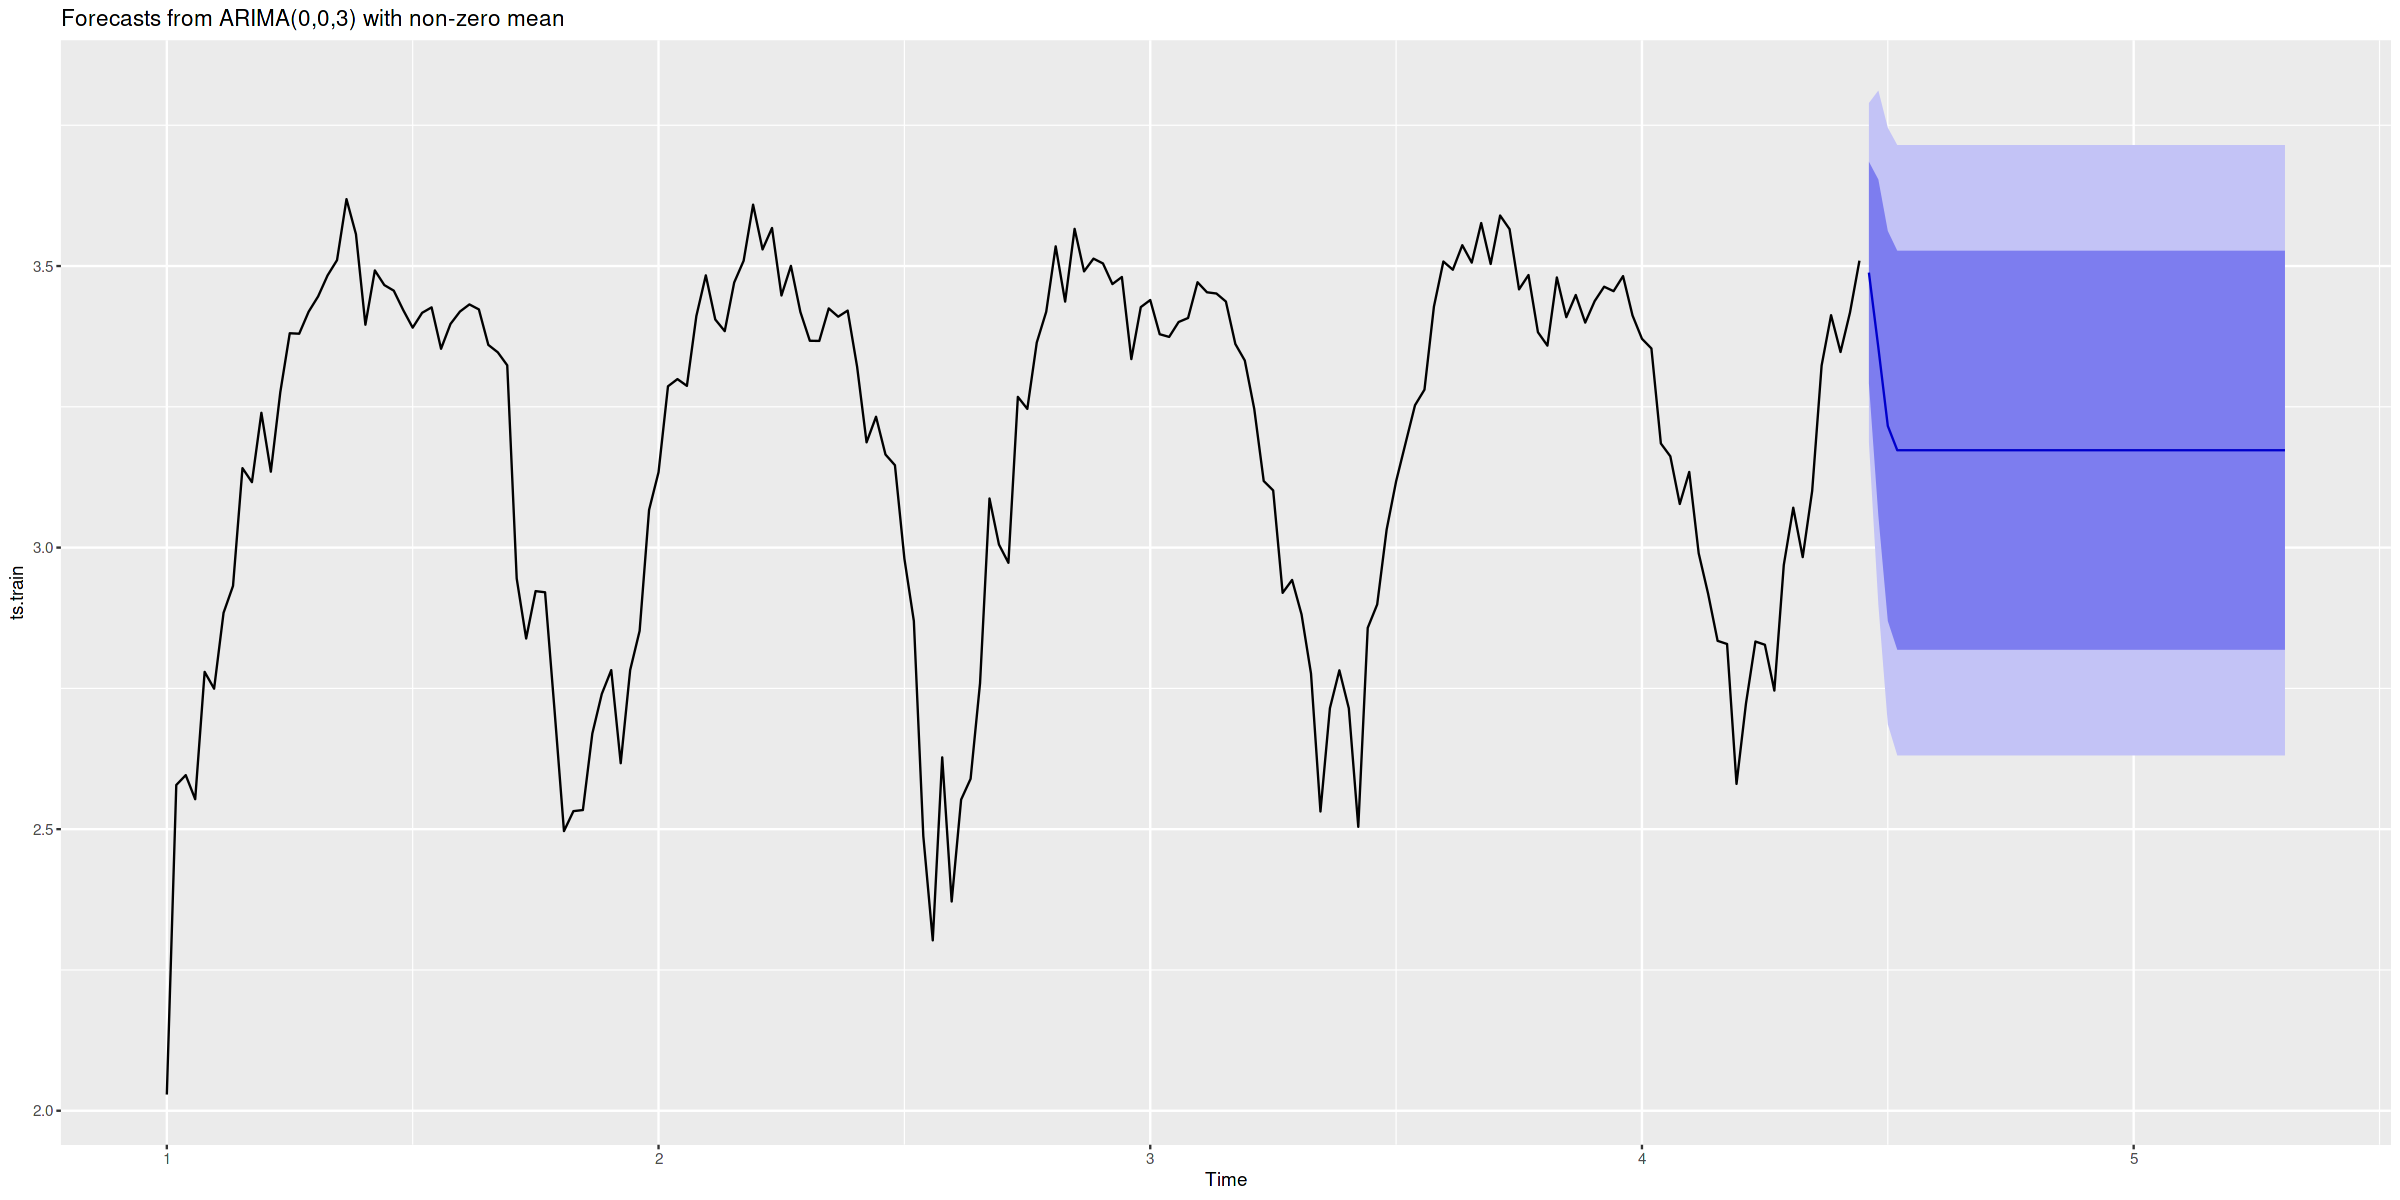

In [23]:
# résultats prévisionnels
ma_forecast <- forecast(ma, h=length(ts.test))
autoplot(ma_forecast)

<div id="ARMA-model">
        <h1 style="color:#1a1a1a;
                    ">
        ⮞ Autoregressive Moving Average (ARMA)
        </h1>
</div>

<span style="color:grey; font-size:1.2em">Cette approche rejoint essentiellement les deux précédents AR et MA. Les paramètres du modèle seront la somme des deux.</span>


In [24]:
# méthode ARMA
arma <- arima(ts.train, order=c(3,0,1))
summary(arma)


Call:
arima(x = ts.train, order = c(3, 0, 1))

Coefficients:
         ar1      ar2      ar3      ma1  intercept
      1.7248  -0.5372  -0.2183  -0.9424     3.1900
s.e.  0.0812   0.1583   0.0809   0.0292     0.0172

sigma^2 estimated as 0.0121:  log likelihood = 139.73,  aic = -267.45

Training set error measures:
                       ME      RMSE        MAE        MPE     MAPE     MASE
Training set -0.003895664 0.1100074 0.08058695 -0.2424904 2.713893 0.911799
                    ACF1
Training set -0.07683311

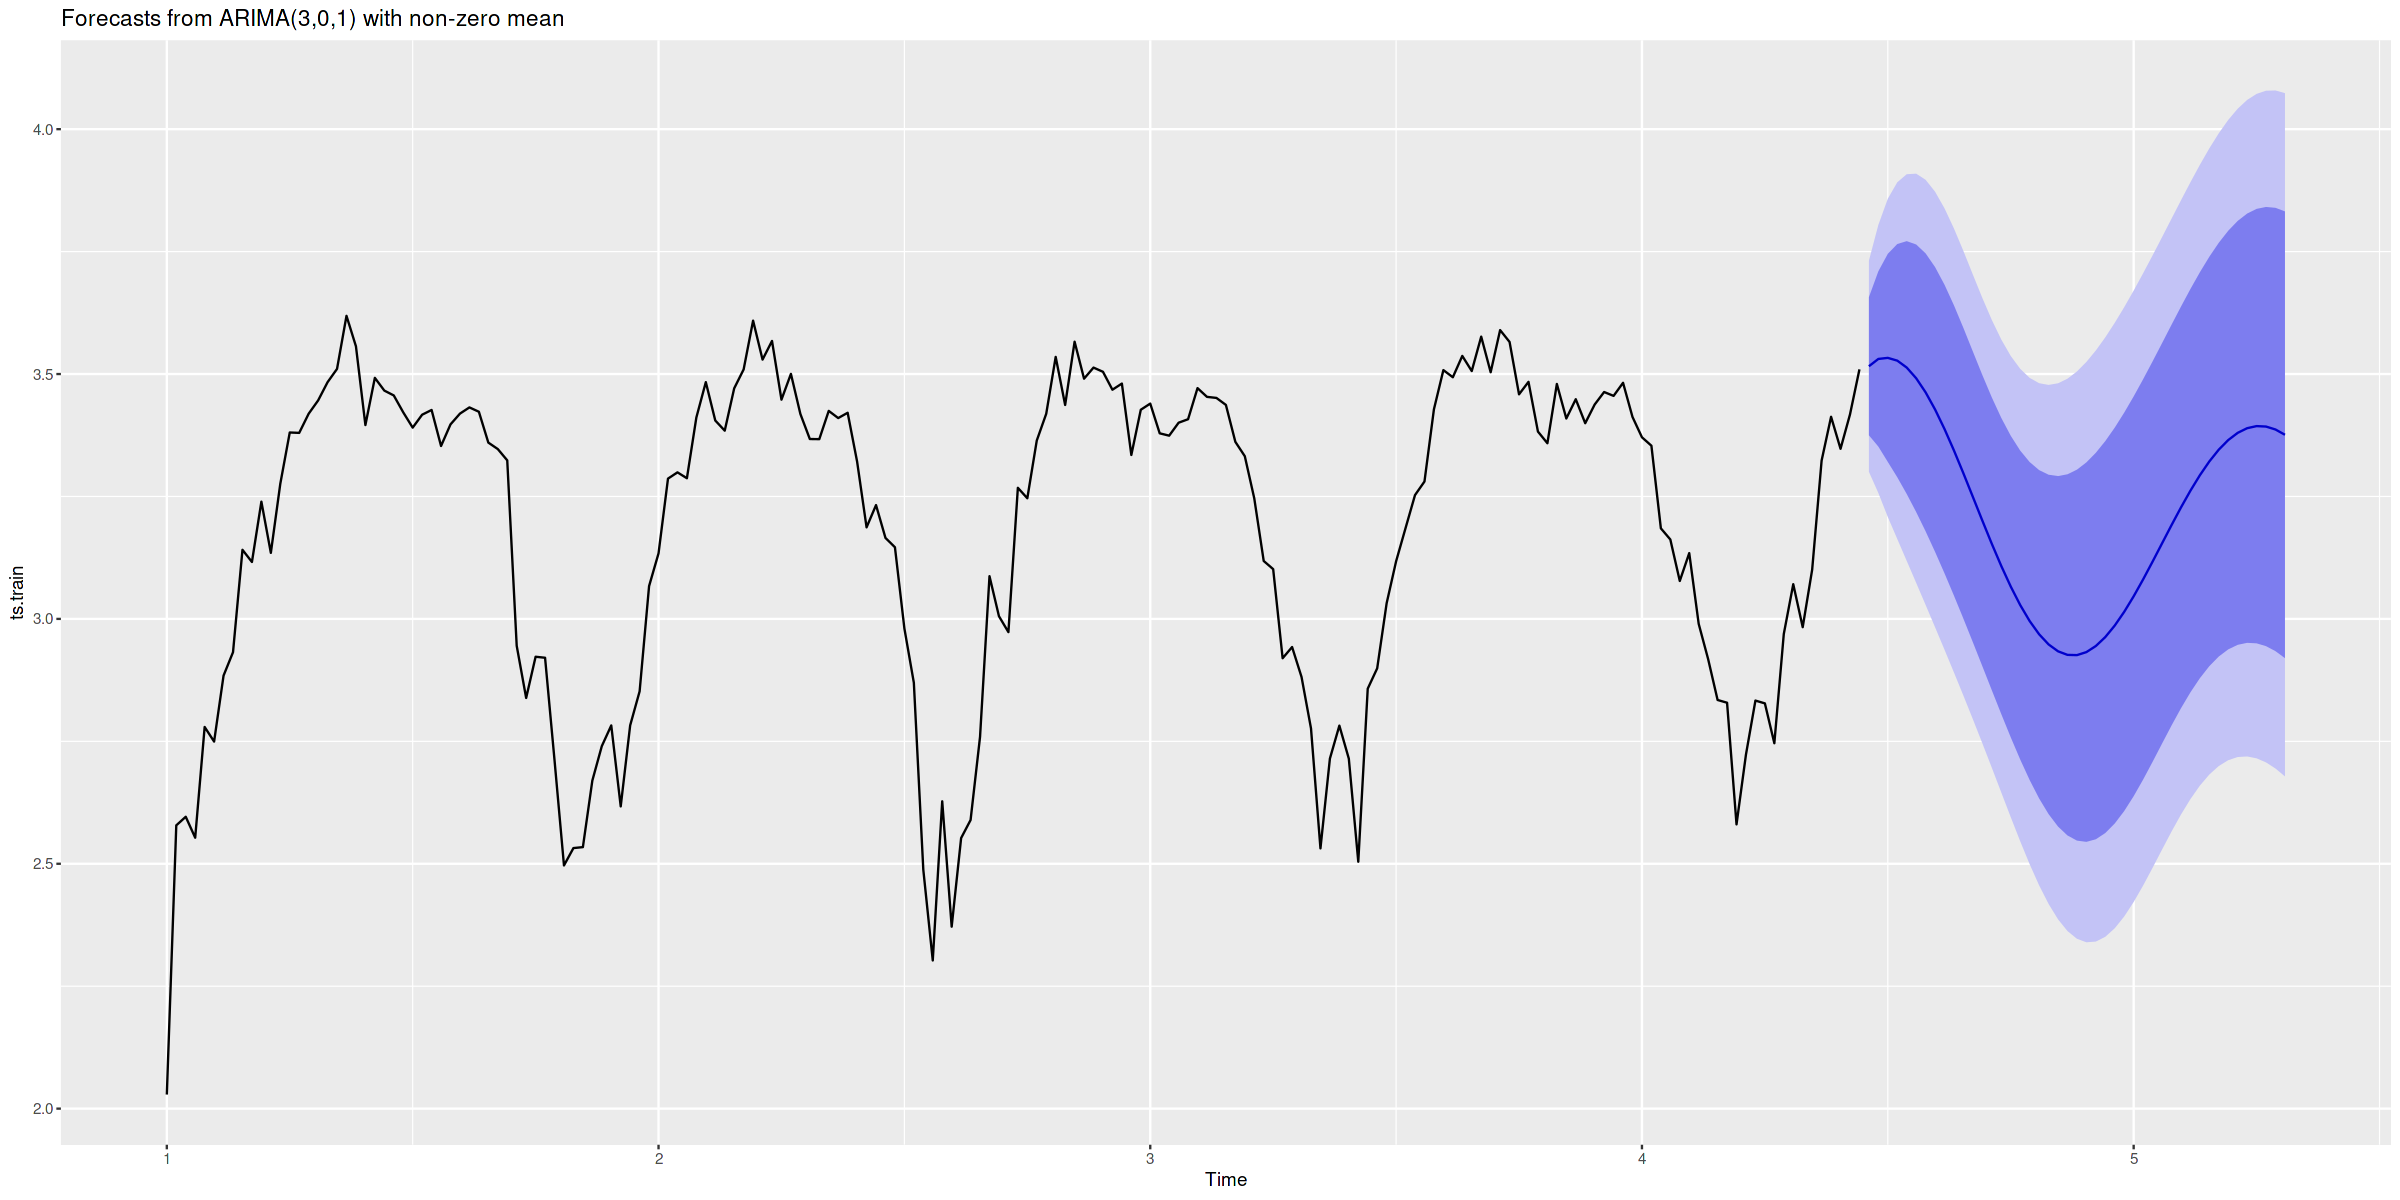

In [25]:
# résultats prévisionnels
arma_forecast <- forecast(arma, h=length(ts.test))
autoplot(arma_forecast)

<div id="ARIMA-model">
        <h1 style="color:#1a1a1a;
                    ">
        ⮞ Autoregressive integraded moving average (ARIMA)
        </h1>
</div>

<span style="color:grey; font-size:1.2em">Dans un modèle ARIMA, 3 paramètres sont utilisés pour aider à modéliser les principaux aspects d'une série temporelle : la saisonnalité, la tendance et le bruit. Ces paramètres sont étiquetés p, d et q.</span>

In [26]:
# méthode ARIMA
arima <- arima(ts.train, order=c(7,1,2))
summary(arima)


Call:
arima(x = ts.train, order = c(7, 1, 2))

Coefficients:
         ar1      ar2     ar3     ar4      ar5      ar6      ar7      ma1
      1.2138  -0.1952  0.0927  0.0241  -0.1421  -0.0352  -0.0429  -1.4110
s.e.  0.3999   0.3406  0.1421  0.1393   0.1312   0.1320   0.1259   0.3969
         ma2
      0.4157
s.e.  0.3932

sigma^2 estimated as 0.01216:  log likelihood = 138.85,  aic = -257.7

Training set error measures:
                     ME      RMSE        MAE       MPE     MAPE      MASE
Training set 0.01918291 0.1099443 0.08304806 0.5333675 2.749395 0.9396452
                     ACF1
Training set -0.005939869

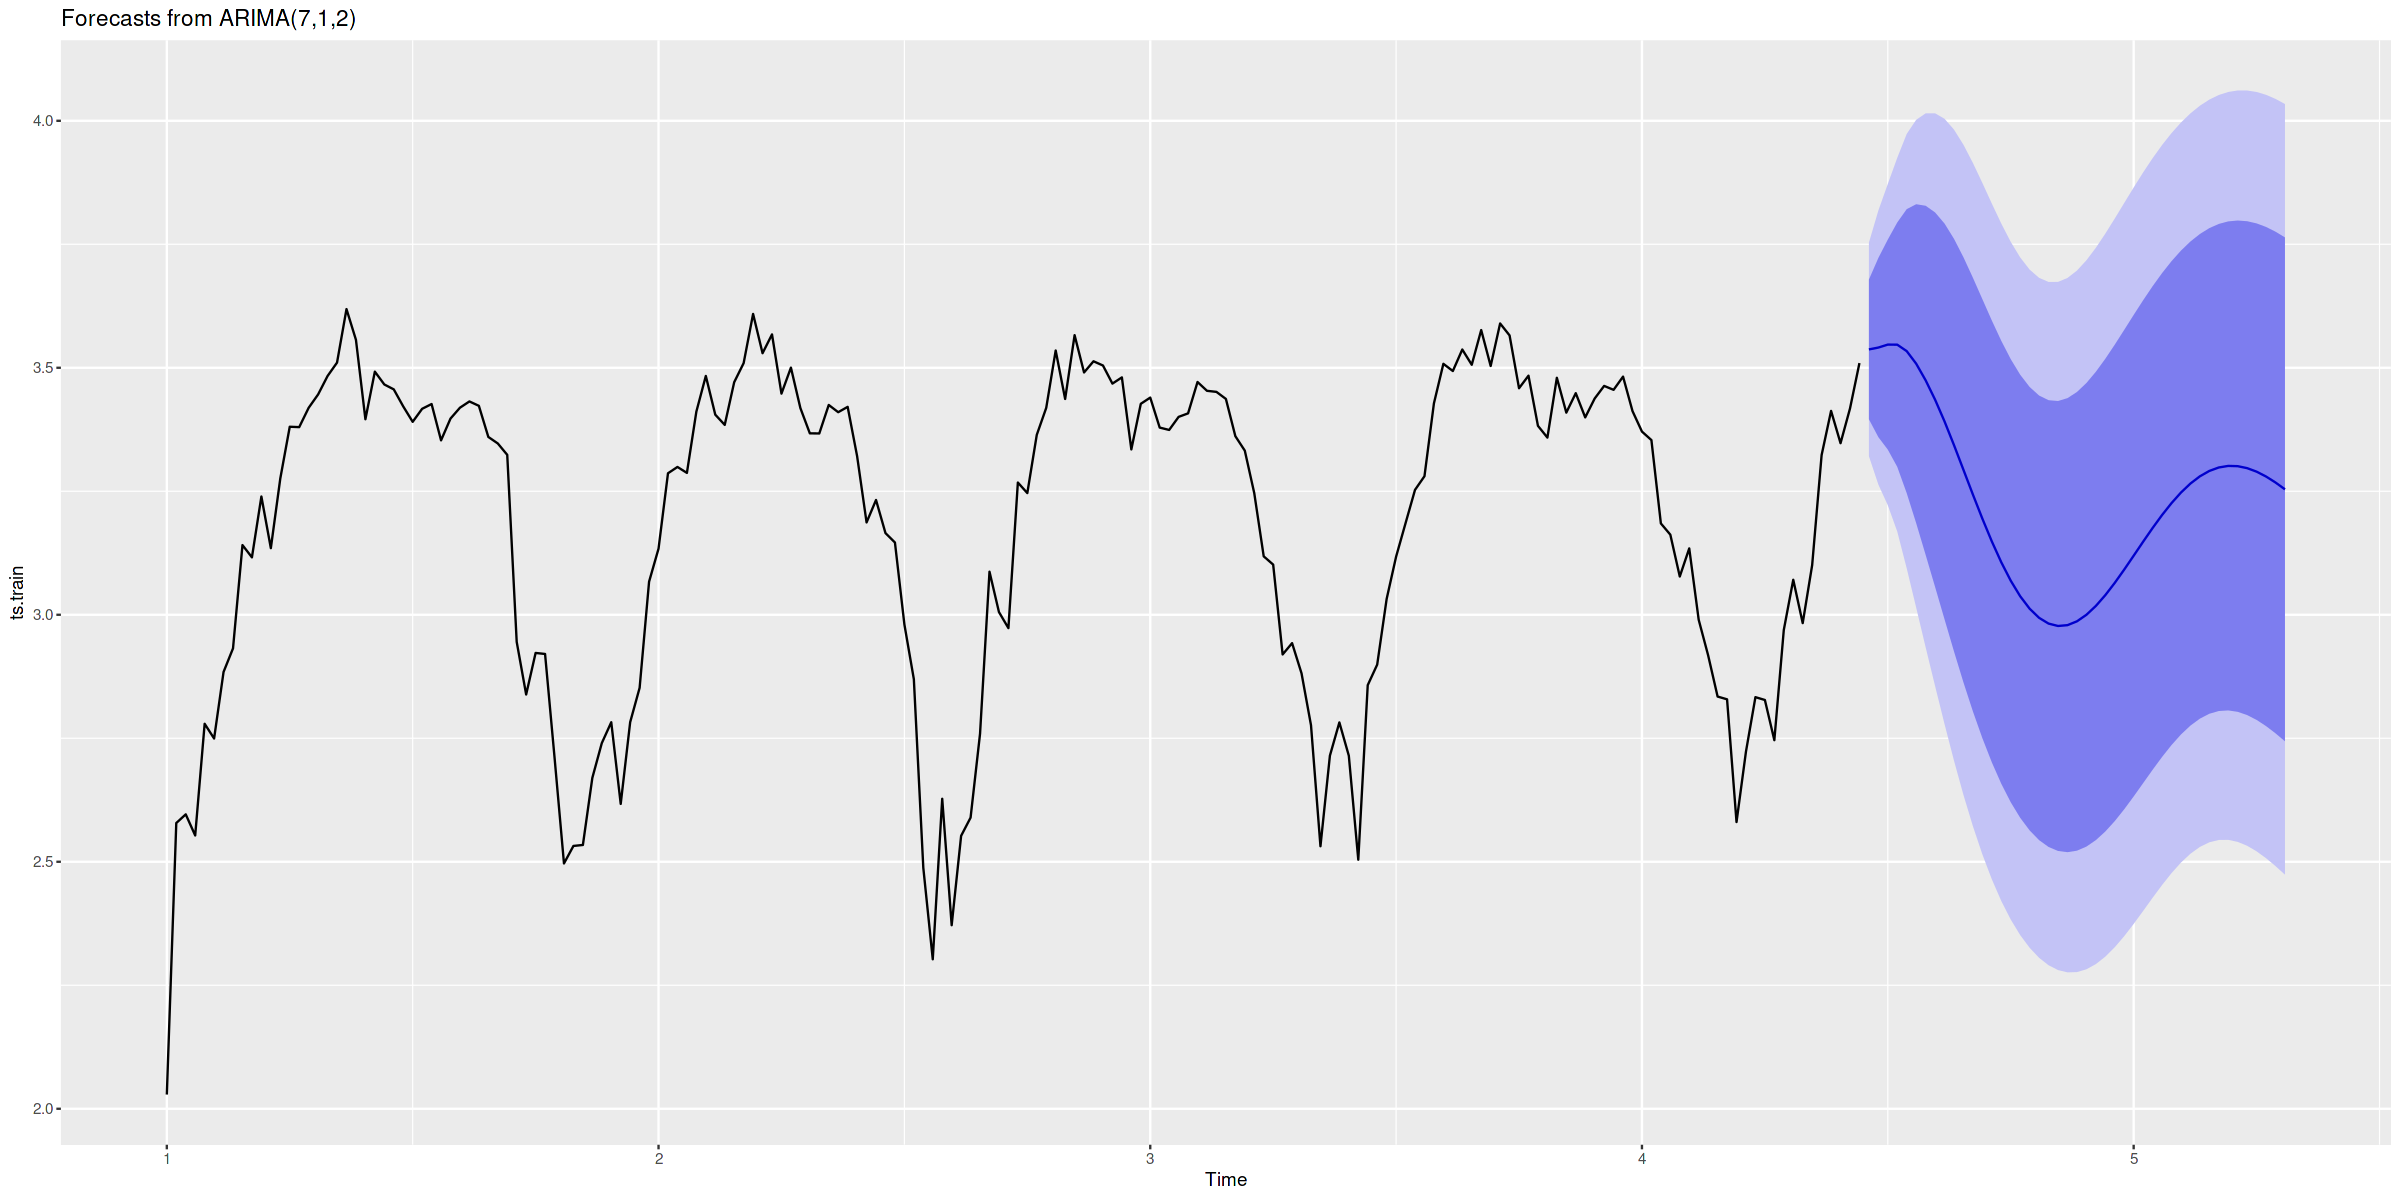

In [27]:
# résultats prévisionnels
arima_forecast <- forecast(arima, h=length(ts.test))
autoplot(arima_forecast)

<div id="SARIMA-model">
        <h1 style="color:#1a1a1a;
                    ">
        ⮞ Seasonal autoregressive integrated moving average (SARIMA)
        </h1>
</div>

<span style="color:grey; font-size:1.2em">
La moyenne mobile composite autorégressive saisonnière, SARIMA ou ARIMA saisonnière, est une extension d'ARIMA qui prend explicitement en charge les données de séries chronologiques univariées avec des composantes saisonnières.

Il ajoute trois nouveaux hyperparamètres pour spécifier l'autorégressif (AR), le différentiel (I) et la moyenne mobile (MA) de la composante saisonnière de la série, ainsi que des paramètres supplémentaires pour la période de saisonnalité.
</span>

In [28]:
# méthode SARIMA
sarima <- arima(ts.train, order=c(2,0,2), seasonal = list(order = c(1,0,0), period = 52))
summary(sarima)


Call:
arima(x = ts.train, order = c(2, 0, 2), seasonal = list(order = c(1, 0, 0), 
    period = 52))

Coefficients:
         ar1      ar2      ma1     ma2    sar1  intercept
      1.9535  -0.9792  -1.1965  0.2491  0.0741     3.1900
s.e.  0.0155   0.0153   0.0808  0.0784  0.0882     0.0193

sigma^2 estimated as 0.01191:  log likelihood = 140.96,  aic = -267.92

Training set error measures:
                       ME      RMSE        MAE        MPE     MAPE      MASE
Training set -0.002970627 0.1091529 0.08038306 -0.2122676 2.704795 0.9094921
                    ACF1
Training set -0.04608018

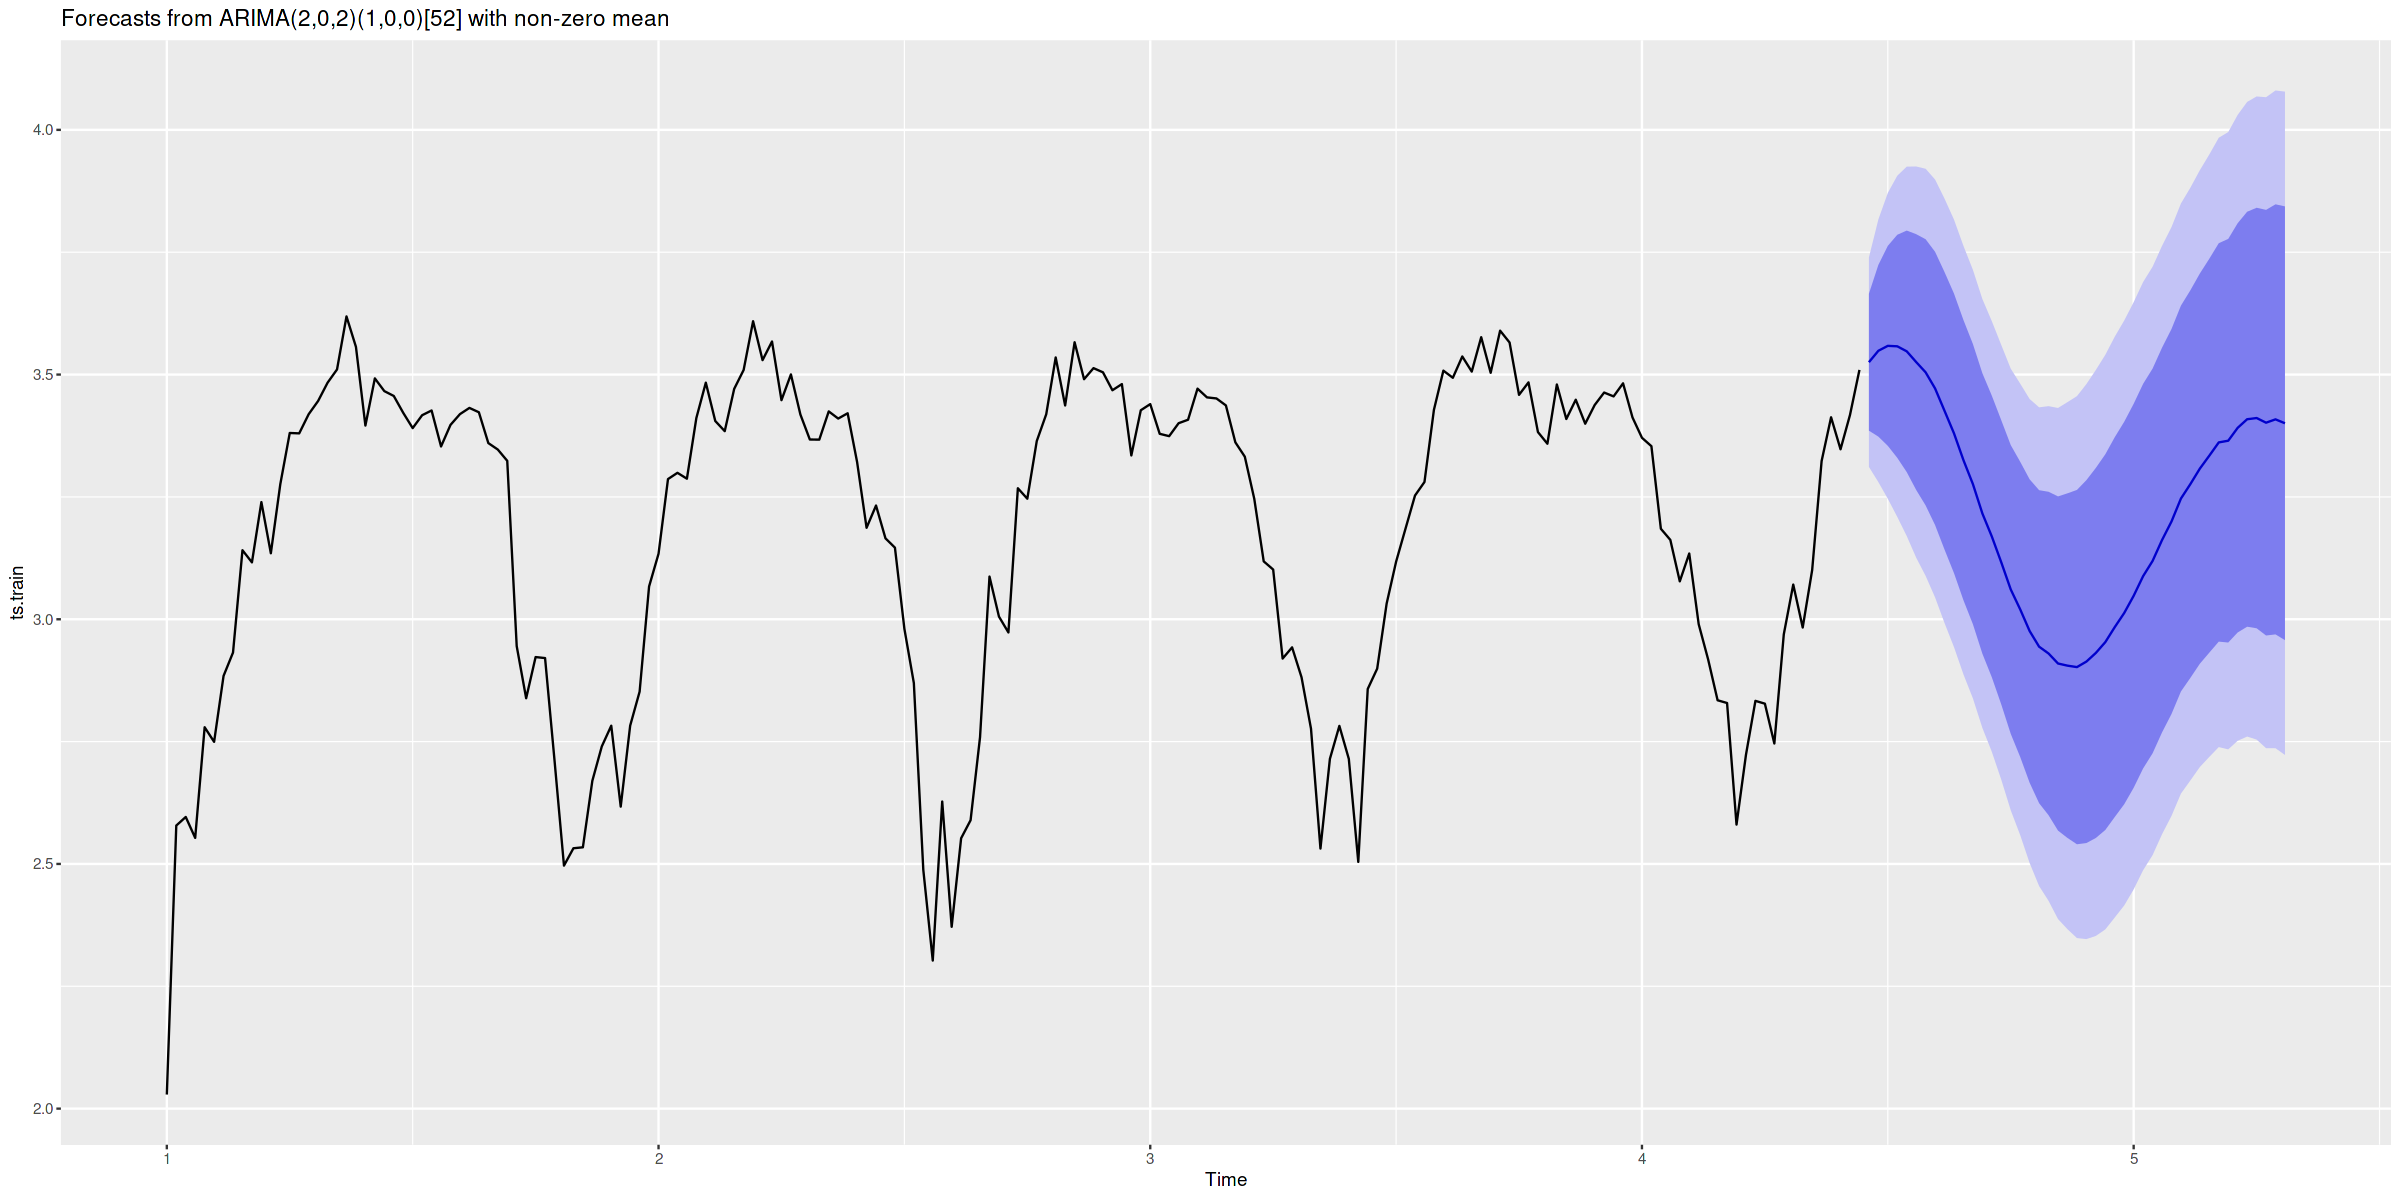

In [29]:
# résultats prévisionnels
sarima_forecast <- forecast(sarima, h = length(ts.test))
autoplot(sarima_forecast)

<center id="Conclusion">
        <h1 style="color:#1a1a1a;
                    font-size:2em">
        Conclusion 📌
        </h1>
</center>

In [30]:
# résultats des différents modèles
methods <- c("ar", "ma", "arma", "arima", "sarima")
aic <- c(ar$aic, ma$aic, arma$aic, arima$aic, sarima$aic) # AIC
log <- c(ar$loglik, ma$loglik, arma$loglik, arima$loglik, sarima$loglik) # Log Liklihood
sigsq <- c(ar$sigma2, ma$sigma2, arma$sigma2, arima$sigma2, sarima$sigma2) # Sigma squared
data.frame(methods, aic, log, sigsq)[order(aic),]

,methods,aic,log,sigsq
,<chr>,<dbl>,<dbl>,<dbl>
5,sarima,-267.9230,140.96150,0.01191437
3,arma,-267.4515,139.72576,0.01210164
1,ar,-262.5708,140.28541,0.01208586
4,arima,-257.6975,138.84873,0.01215525
2,ma,-151.8583,80.92915,0.02361137


<div style="color:grey; font-size:1.2em">Le travail que nous avons réalisé a consisté à exploirer comment la plupart des modèles utilisant des données supplémentaires surperforment les statistiques traditionnelles sur des séries temporelles univariées. On bien appris qu'une analyse approfondie de nos séries est necessaice pour détecter la stationnarité ou la saisonnalité particulière qui peut nous obliger à appliquer des transformations à la série et peut déterminer notre choix de modèle. 
<br>
<br>
<span style="color:black; font-size:1.3em; background-color:#FFFFA6">Ce projet nous a permis d'acquérir les techniques d'analyse, de transformation et les methodes de prévision sur les séries chronologiques.</span>
</div>